In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))


['test.csv', 'train.csv', 'sample_submission.csv']


**Data Visualization**

Visualizing Data is a very important step in a Data Science project.  As per the recent Kagagle Survey 10-20% of the total Data Science Project time is spent on visualizing data. https://www.kaggle.com/rajeshcv/state-of-data-science-machine-learning-2018

SaS Data Visualization’s webpage explain Data visualization  beautifully.

*'The way the human brain processes information, using charts or graphs to visualize large amounts of complex data is easier than poring over spreadsheets or reports. Data visualization is a quick, easy way to convey concepts in a universal manner — and you can experiment with different scenarios by making slight adjustments.'*

In the Santander Customer Transaction Prediction competition the features are predominently numeric.

This kernel's objective is to
*     Understand the value distribution in various features through boxplots and histograms. 
*     Seggregate features into groups based on range of values.
*     Identify  features with similiar value distribution.
*     To understand if there is any difference in values between the two target groups 'transaction done and 'transaction not done'
*  Check whether feature values in test and train comes from the same sampling  distribution.




In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


All the 200 features have numeric values . Let's check first if some of these numeric features are categorical  or boolean .In that case they will have less than 500 unique values.

In [5]:
likely_cat = {}
for c in train.columns:
    likely_cat[c] = 1.*train[c].nunique()/train[c].count() < 0.005
likely_cat= pd.Series(likely_cat)
likely_cat[likely_cat==True]

target    True
var_68    True
dtype: bool

In [6]:
train.var_68.nunique()

451

None of the features are categorical or boolean except 'target'. Let's understand the range of values of each of these features by plotting the max, min and median value of the features.

In [7]:
trainvaluedist = pd.DataFrame(train.iloc[:,2:].max(axis=0),columns=["Max_value"])
trainvaluedist['Min_value'] = train.iloc[:,2:].min(axis=0)
trainvaluedist['Median_value'] = train.iloc[:,2:].median(axis=0)
trainvaluedist.head()

,Max_value,Min_value,Median_value
var_0,20.3150,0.4084,10.52475
var_1,10.3768,-15.0434,-1.60805
var_2,19.3530,2.1171,10.58000
var_3,13.1883,-0.0402,6.82500
var_4,16.6714,5.0748,11.10825


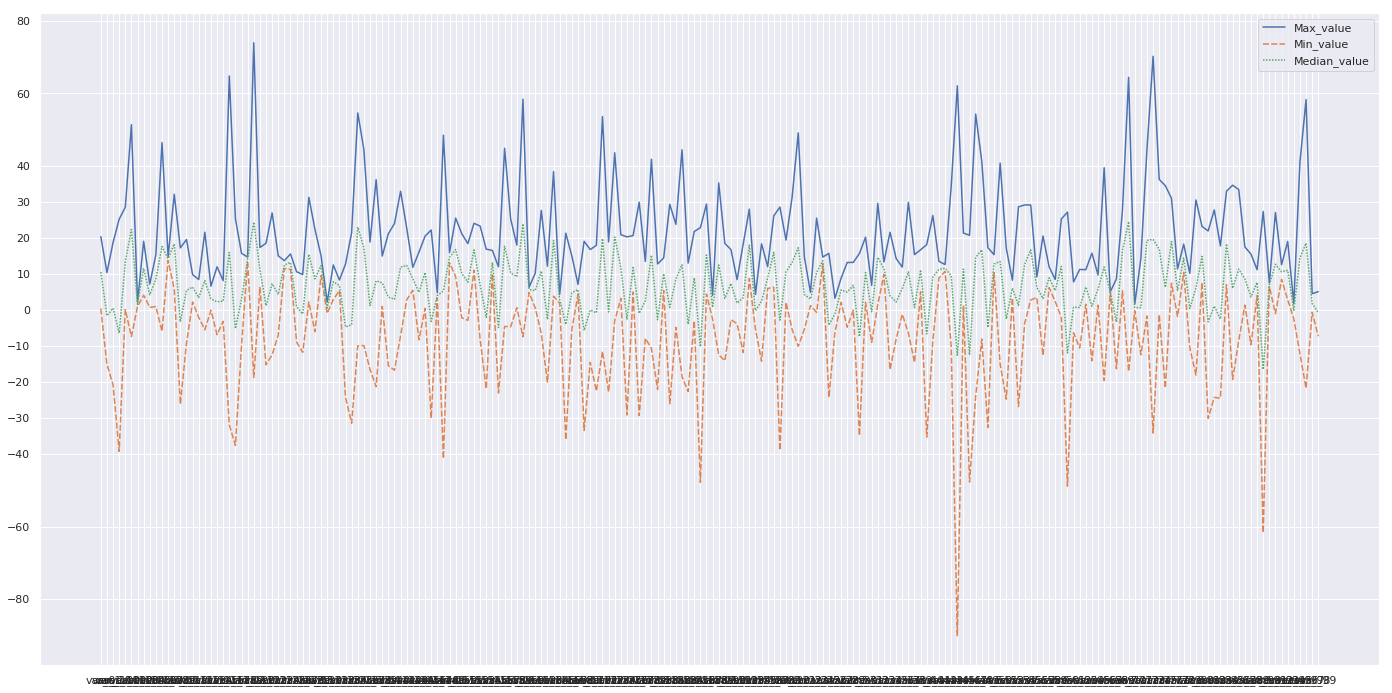

In [8]:
sns.set(rc={'figure.figsize':(24,12)})
line=sns.lineplot(data=trainvaluedist )
line= line.set(yticks=[-80,-60,-40,-30,-20,-10,0,10,20,30,40,60,80])


Combined all values in the features are between 80 and -90.  From the plot it looks like the features can be seggregrated into 10 groups  based on their max and min values.

In [9]:
colzerototen= [c for c in train.iloc[:,2:].columns if (train.loc[:,c].min() >=0) & (train.loc[:,c].max()< 10) ]
print('Number of features with positive values and maximum value less than 10 :',len(colzerototen))
colzerototwenty= [c for c in train.iloc[:,2:].columns if (train.loc[:,c].min() >=0) & (train.loc[:,c].max() >= 10) & (train.loc[:,c].max() < 20)  ]
print('Number of features with positive values maximum value between 10 & 20 :',len(colzerototwenty))
colzeroandtwentyplus= [c for c in train.iloc[:,2:].columns if (train.loc[:,c].min() >=0) & (train.loc[:,c].max() >= 20)]
print('Number of features with positive values maximum value > 20 :',len(colzeroandtwentyplus))
colzerominus= [c for c in train.iloc[:,2:].columns if train.loc[:,c].max() <0 ]
print('Number of features with only negative values :',len(colzerominus))
colplustenminusten= [c for c in train.iloc[:,2:].columns if (train.loc[:,c].max() <= 10) & (train.loc[:,c].min() >=-10 )& (train.loc[:,c].min()< 0 )]
print('Number of features with negative values between 10 and -10 :',len(colplustenminusten))
colplustwentyminusten= [c for c in train.iloc[:,2:].columns if (train.loc[:,c].max() <= 20)& (train.loc[:,c].max() > 10) & (train.loc[:,c].min() >=-10 ) & (train.loc[:,c].min() < 0 )]
print('Number of features with max value between 10 and 20 and min value between  between 0 and -10  :',len(colplustwentyminusten))
colplustwentyminustwenty= [c for c in train.iloc[:,2:].columns if (train.loc[:,c].max() <= 20) &  (train.loc[:,c].min() < -10 ) & (train.loc[:,c].min() >= -20 )]
print('Number of features with max value less than 20 and min value between -10 and -20 :',len(colplustwentyminustwenty))
colplustwentyminustwentyless= [c for c in train.iloc[:,2:].columns if (train.loc[:,c].max() <= 20)& (train.loc[:,c].min() < -20 )]
print('Number of features with max value less than 20 and min value less than -20 :',len(colplustwentyminustwentyless))
colplustwentymoreminusten= [c for c in train.iloc[:,2:].columns if (train.loc[:,c].max() >20)& (train.loc[:,c].min()< 0 ) & (train.loc[:,c].min()>= -10 )]
print('Number of features with max value more than 20 and min value more than -10 :',len(colplustwentymoreminusten))
colplustwentymoreminustwenty= [c for c in train.iloc[:,2:].columns if (train.loc[:,c].max() >20)& (train.loc[:,c].min()< -10 ) & (train.loc[:,c].min()>= -20 )]
print('Number of features with max value more than 20 and min value between -10 and -20:',len(colplustwentymoreminustwenty))
colplustwentymoreminustwentymore= [c for c in train.iloc[:,2:].columns if (train.loc[:,c].max() >20)& (train.loc[:,c].min()< -20 )]
print('Number of features with max value more than 20 and min value less than -20:',len(colplustwentymoreminustwentymore))

Number of features with positive values and maximum value less than 10 : 16
Number of features with positive values maximum value between 10 & 20 : 31
Number of features with positive values maximum value > 20 : 22
Number of features with only negative values : 0
Number of features with negative values between 10 and -10 : 14
Number of features with max value between 10 and 20 and min value between  between 0 and -10  : 17
Number of features with max value less than 20 and min value between -10 and -20 : 15
Number of features with max value less than 20 and min value less than -20 : 16
Number of features with max value more than 20 and min value more than -10 : 28
Number of features with max value more than 20 and min value between -10 and -20: 17
Number of features with max value more than 20 and min value less than -20: 24


**Features with  positive values and maximum value less than 10**

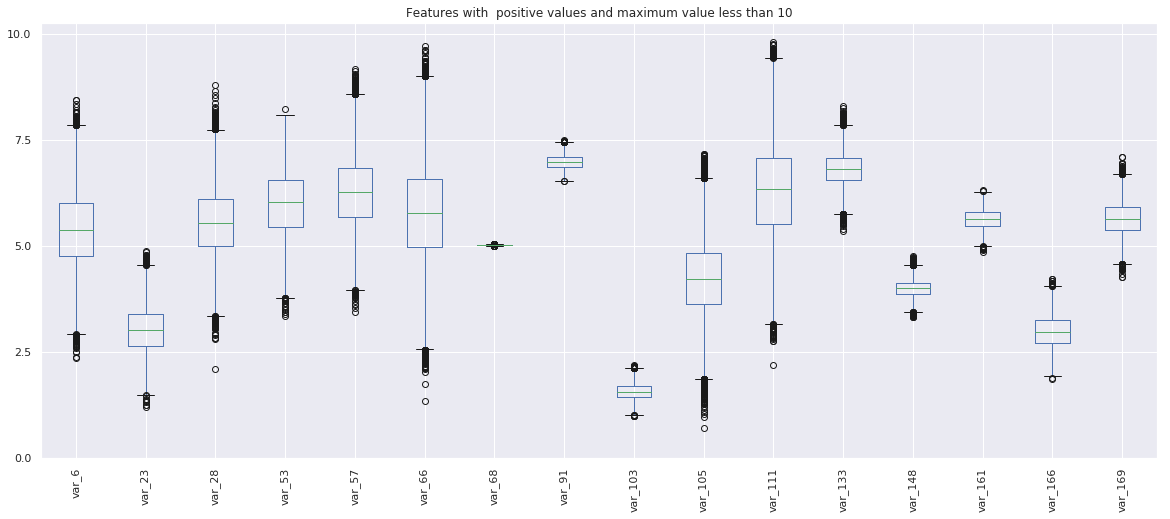

In [10]:
sns.set(rc={'figure.figsize':(20,8)})
setpositive=train.loc[:,colzerototen].boxplot(rot=90)
setpositive=setpositive.set(yticks=[0,2.5,5,7.5,10],title="Features with  positive values and maximum value less than 10")

var_68,var_91,var_103,var_148 and var_161 have comparatively lower range of values .
The histograms below shows the distribution of values in cases of transaction done in green color (target=1) and transaction not done (target=0) in red colour.

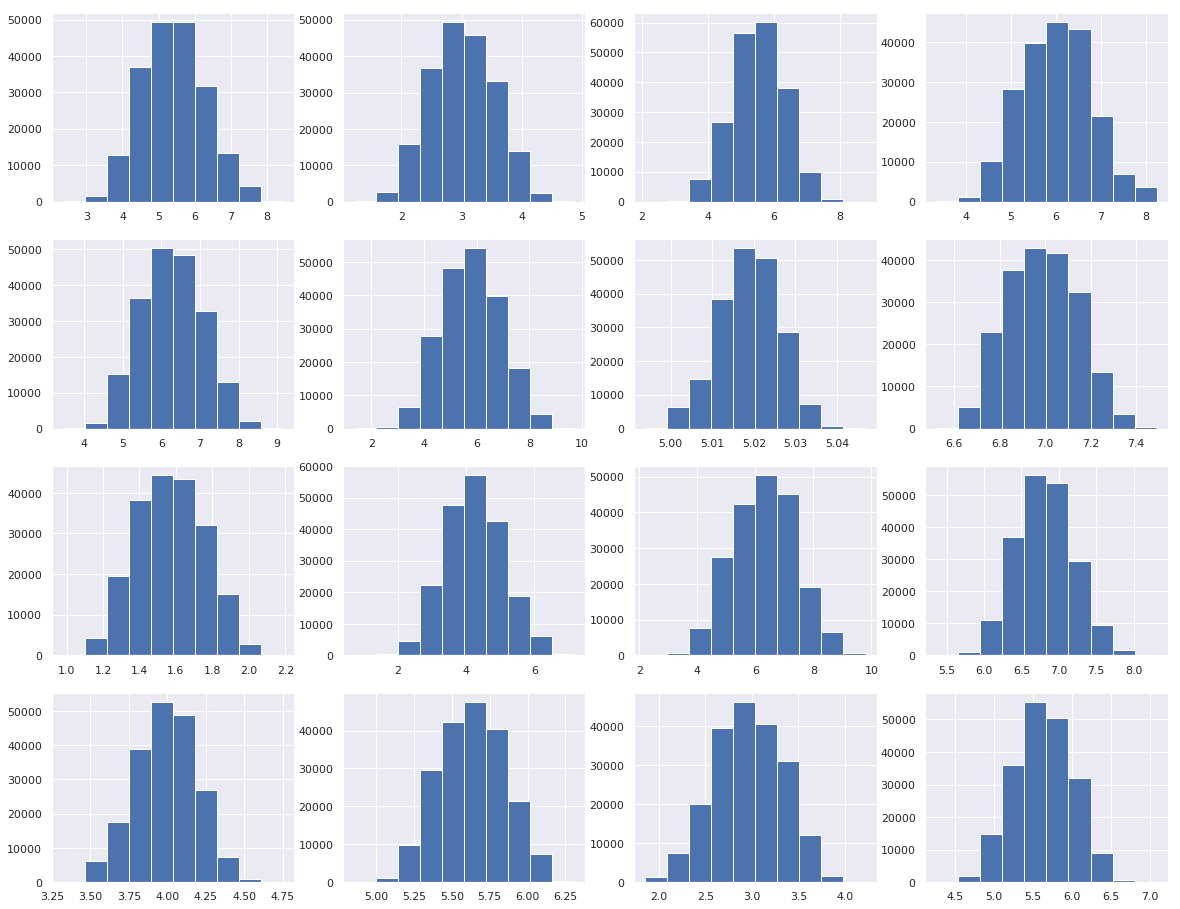

In [11]:
sns.set(rc={'figure.figsize':(20,16)})
plotlist =['hist'+ str(col) for col in colzerototen]

for k in range(len(colzerototen)):
     plt.subplot(4,4,k+1)
     plotlist[k] =plt.hist(train[colzerototen[k]])
     #plotlist[k].set(title=colzerototen[k])
    


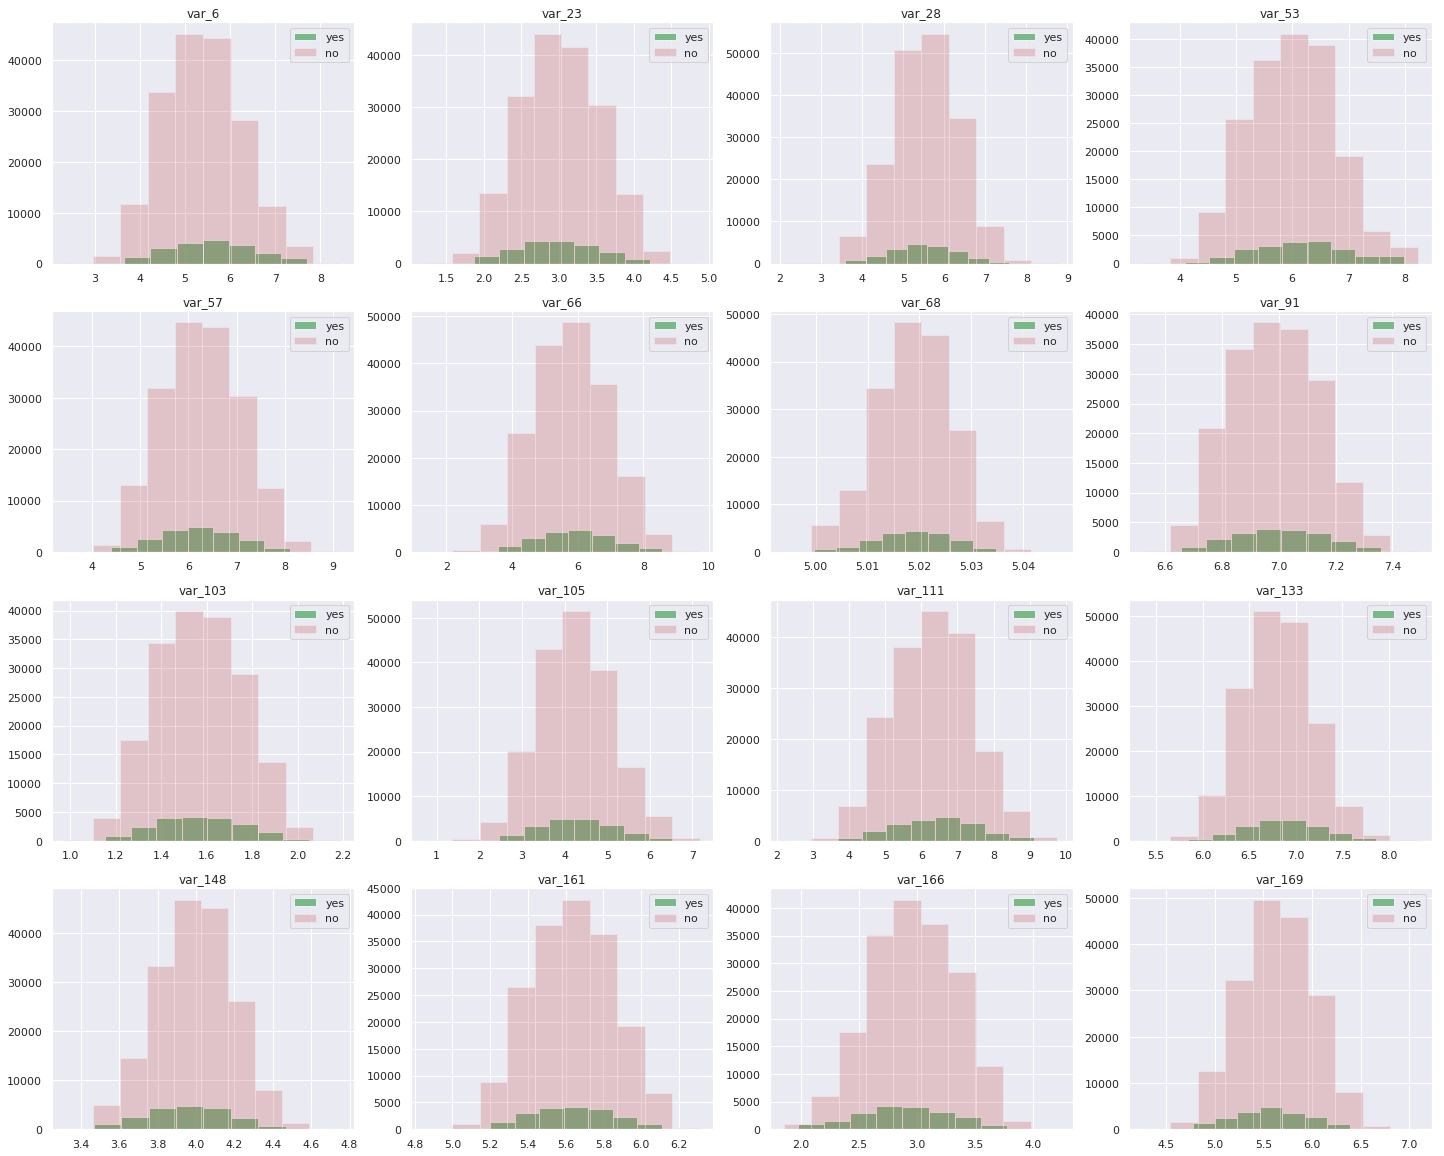

In [12]:
sns.set(rc={'figure.figsize':(20,16)})
def sephist(col):
    yes = train[train['target'] == 1][col]
    no = train[train['target'] == 0][col]
    return yes, no

for num, alpha in enumerate(colzerototen):
    plt.subplot(4, 4, num+1)
    plt.hist(sephist(alpha)[0], alpha=0.75, label='yes', color='g')
    plt.hist(sephist(alpha)[1], alpha=0.25, label='no', color='r')
    plt.legend(loc='upper right')
    plt.title(alpha)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

var_103 values lie  between 1.1 and 2 , var_148 between 3.4 and 4.6 , var_68 values are in a narrow range between 4.99 and 5.04,   var_161 between 5 and 6.2  &  var_91 between 6.6 and 7.4.  Considering var_166 with values between 2 and 4 and var_169 and var_133  they all appear to be in sequence.

However there is no significant difference in values between the "transaction done" and "transaction not done" groups

**Features with  positive values and maximum value between 10 & 20**

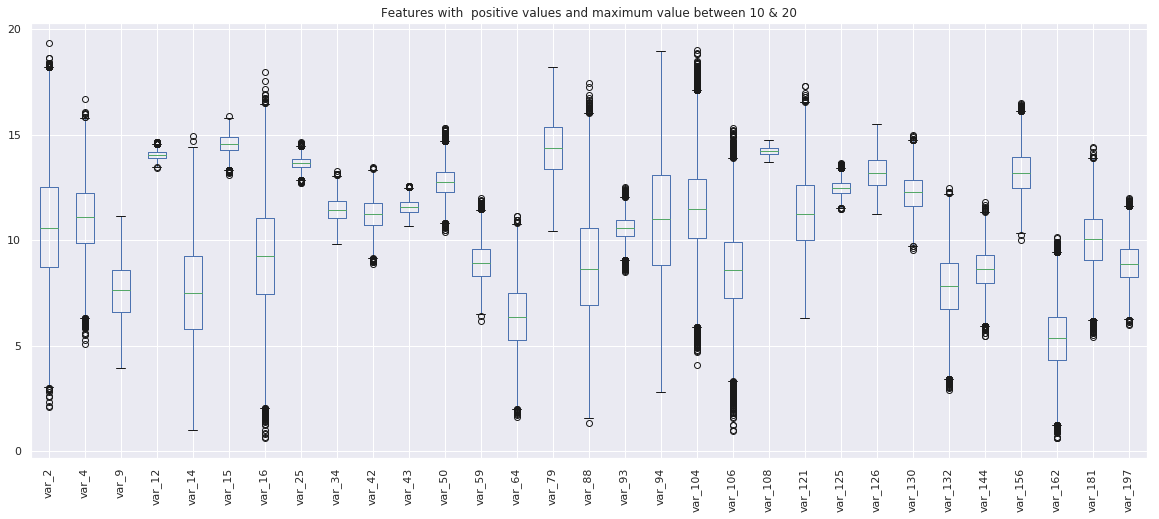

In [13]:
sns.set(rc={'figure.figsize':(20,8)})
setpositive20=train.loc[:,colzerototwenty].boxplot(rot=90)
setpositive20=setpositive20.set(yticks=[0,5,10,15,20],title="Features with  positive values and maximum value between 10 & 20")

var_12,  var_15 ,var_25, var_34,  var_43, var_108, var_125 have very low range of values further elaborated by the histogram below.

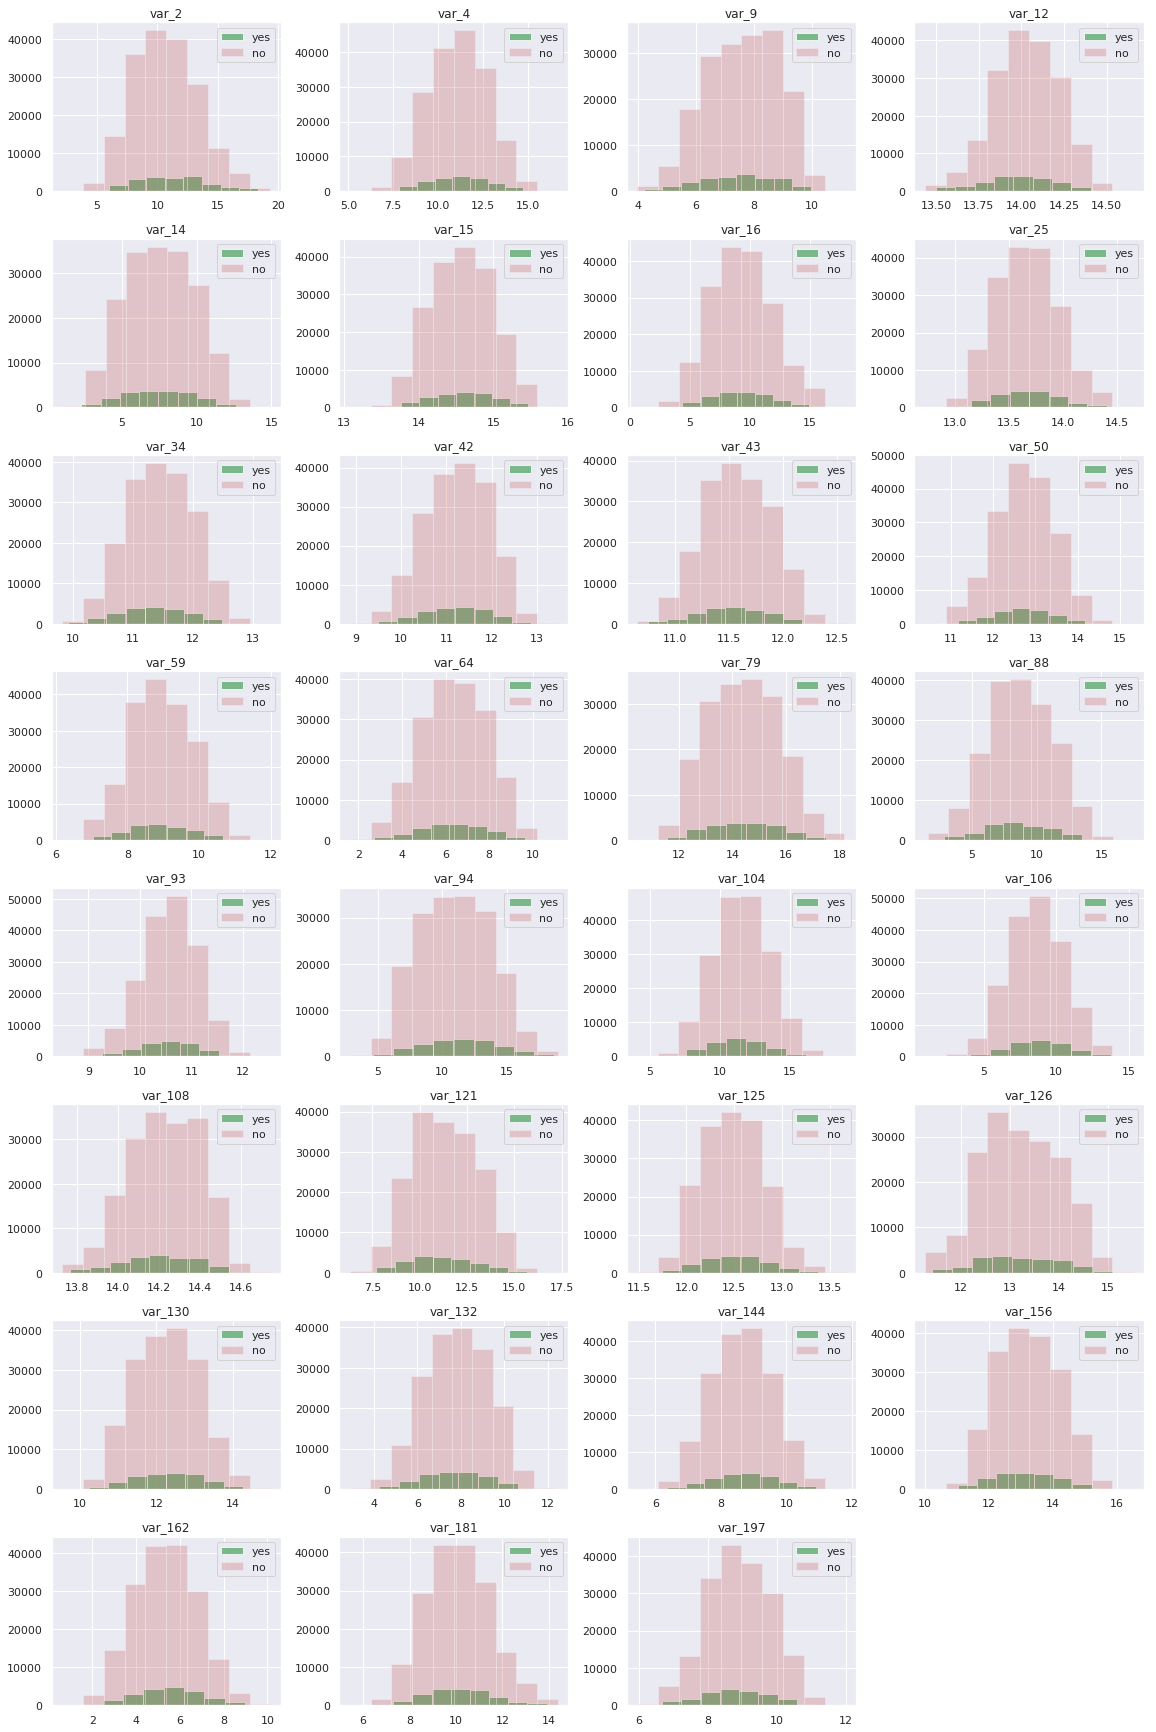

In [14]:
sns.set(rc={'figure.figsize':(16,24)})
for num, alpha in enumerate(colzerototwenty):
    plt.subplot(8, 4, num+1)
    plt.hist(sephist(alpha)[0], alpha=0.75, label='yes', color='g')
    plt.hist(sephist(alpha)[1], alpha=0.25, label='no', color='r')
    plt.legend(loc='upper right')
    plt.title(alpha)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

All those variables with a short range of values have values in the range 10 to 15 and as in the earlier group appear to be in some sequence.

**Features with  positive values and maximum value greater than 20**

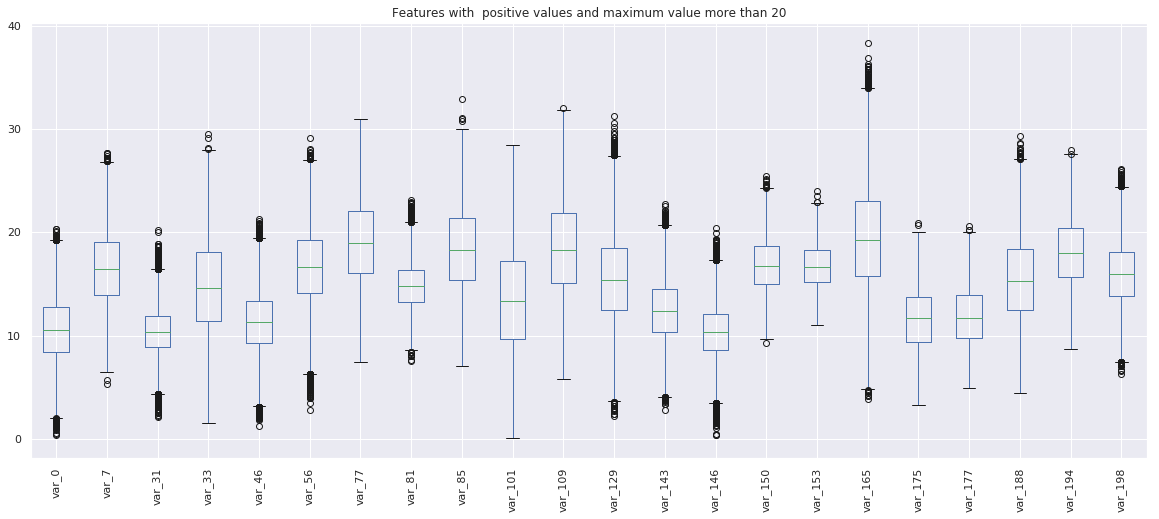

In [15]:
sns.set(rc={'figure.figsize':(20,8)})
setpositive20plus=train.loc[:,colzeroandtwentyplus].boxplot(rot=90)
setpositive20plus=setpositive20plus.set(yticks=[0,10,20,30,40],title="Features with  positive values and maximum value more than 20")

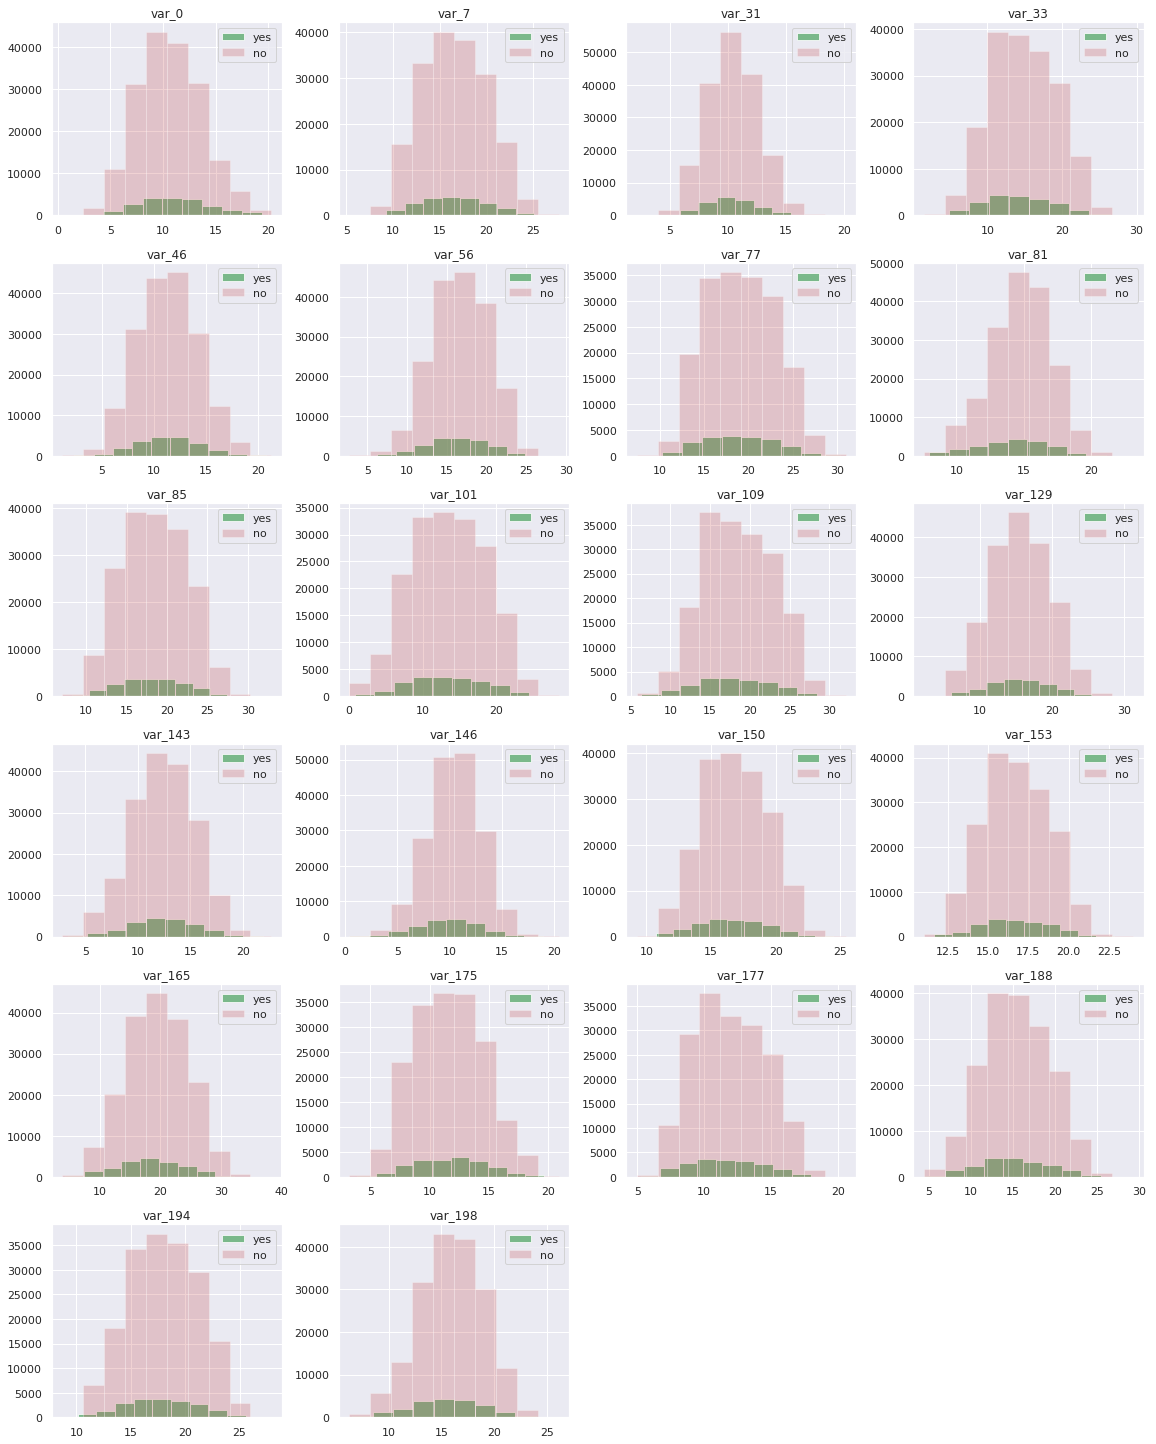

In [16]:
sns.set(rc={'figure.figsize':(16,20)})
for num, alpha in enumerate(colzeroandtwentyplus):
    plt.subplot(6, 4, num+1)
    plt.hist(sephist(alpha)[0], alpha=0.75, label='yes', color='g')
    plt.hist(sephist(alpha)[1], alpha=0.25, label='no', color='r')
    plt.legend(loc='upper right')
    plt.title(alpha)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

var_85, var_194 and  var_198 appear to have similiar distribution of values.  var_0, var_46 , var_56, var_175 and var_177 also appear to have a similiar value distribution.

**Features with  values between 10 and -10**

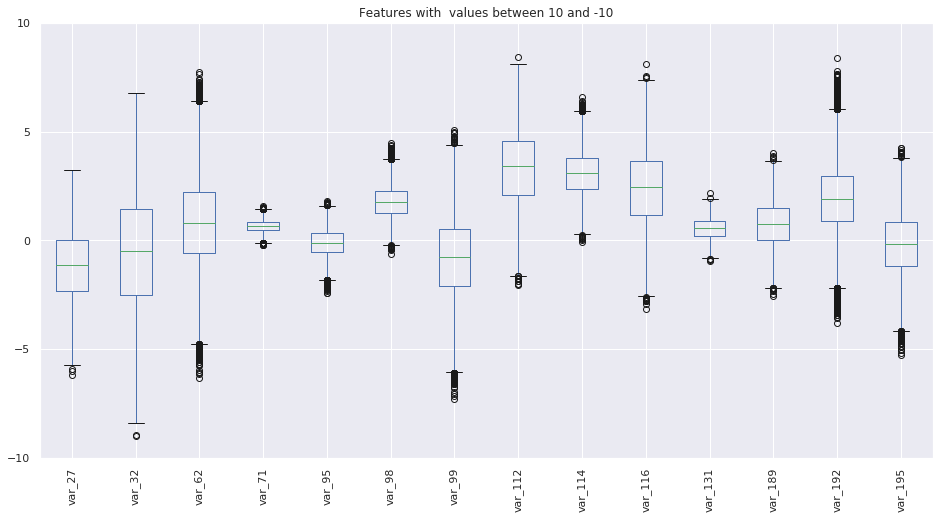

In [17]:
sns.set(rc={'figure.figsize':(16,8)})
setplustenminusten = train.loc[:,colplustenminusten].boxplot(rot=90)
setplustenminusten = setplustenminusten.set(yticks=[-10,-5,0,5,10],title="Features with  values between 10 and -10")

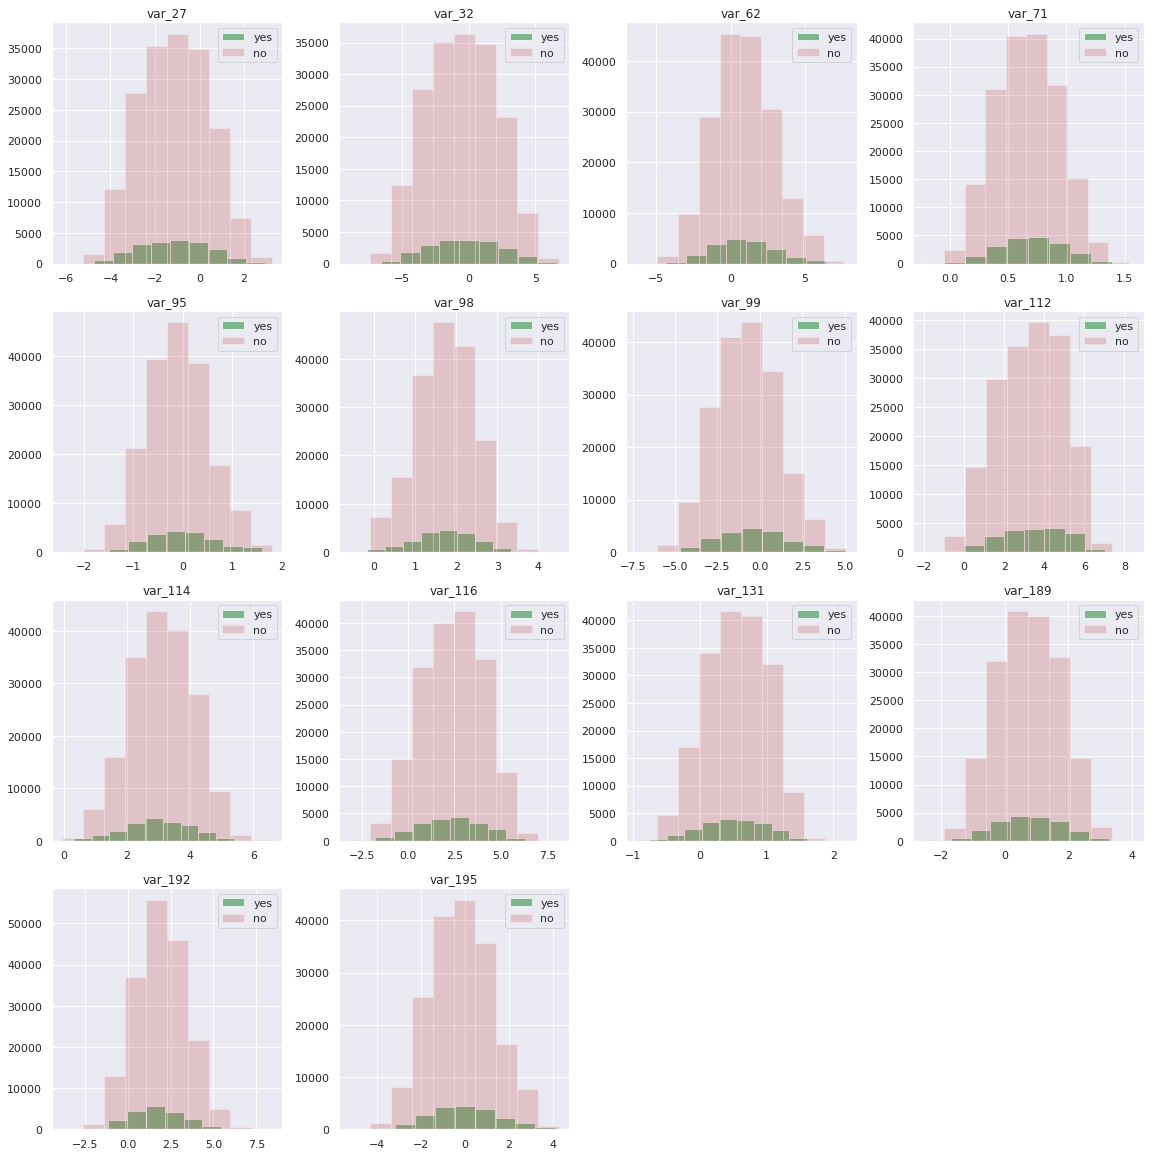

In [18]:
sns.set(rc={'figure.figsize':(16,16)})
for num, alpha in enumerate(colplustenminusten):
    plt.subplot(4, 4, num+1)
    plt.hist(sephist(alpha)[0], alpha=0.75, label='yes', color='g')
    plt.hist(sephist(alpha)[1], alpha=0.25, label='no', color='r')
    plt.legend(loc='upper right')
    plt.title(alpha)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

**Features with  max value between 10 &  20  and min values between 0 & -10**

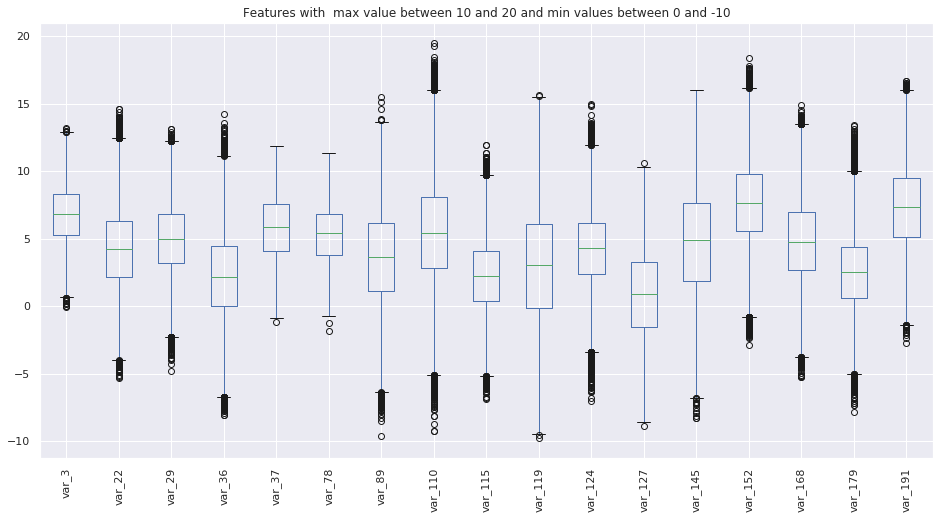

In [19]:
sns.set(rc={'figure.figsize':(16,8)})
setplustwentyminusten = train.loc[:,colplustwentyminusten].boxplot(rot=90)
setplustwentyminusten = setplustwentyminusten.set(yticks=[-10,-5,0,5,10,15,20],title="Features with  max value between 10 and 20 and min values between 0 and -10")

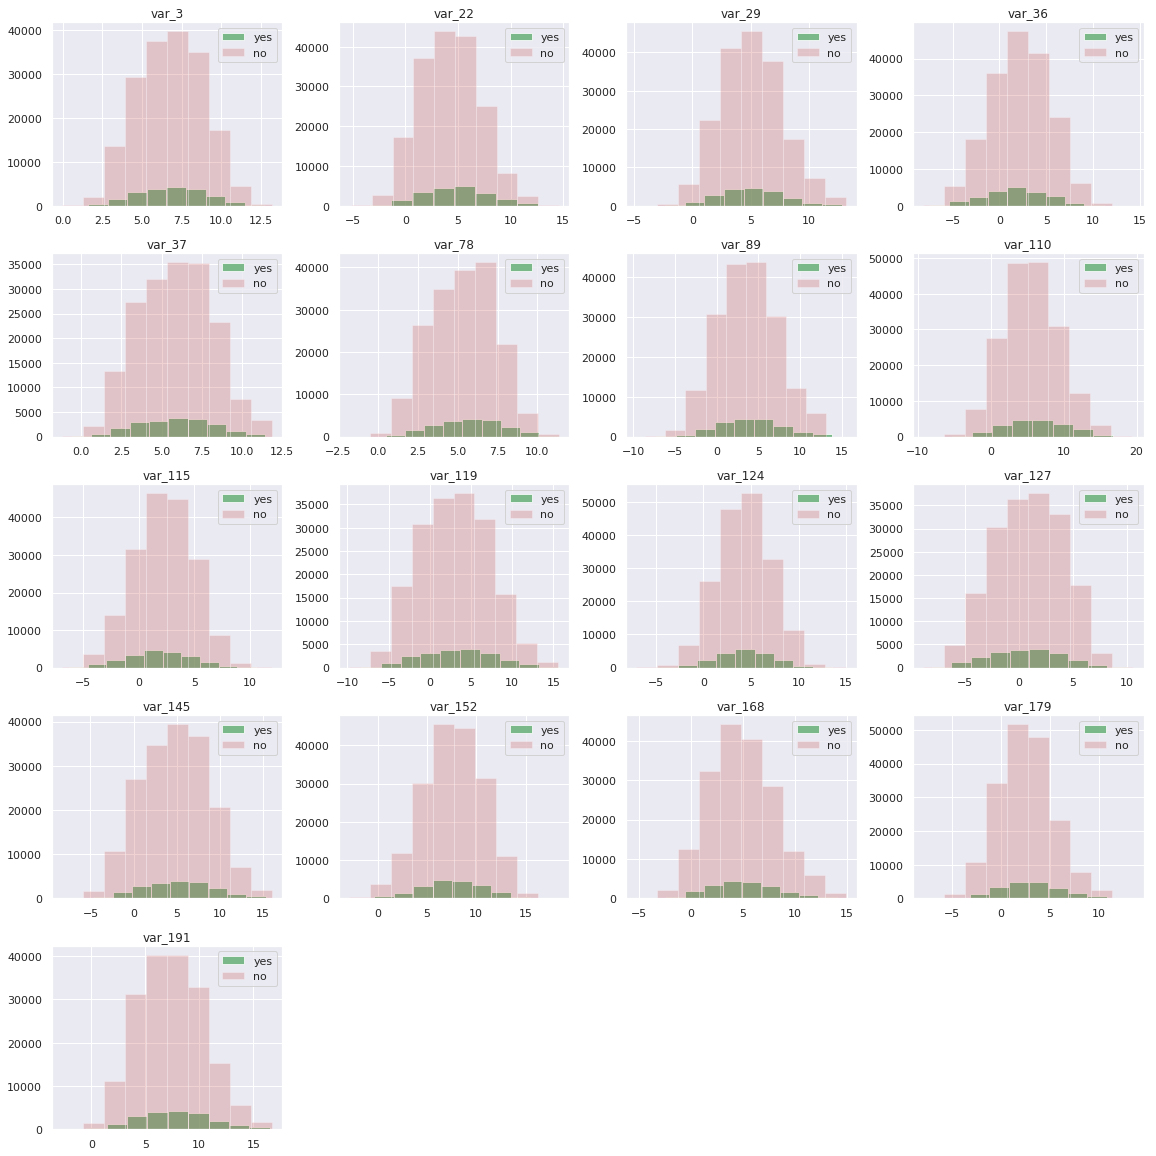

In [20]:
sns.set(rc={'figure.figsize':(16,16)})
for num, alpha in enumerate(colplustwentyminusten):
    plt.subplot(5, 4, num+1)
    plt.hist(sephist(alpha)[0], alpha=0.75, label='yes', color='g')
    plt.hist(sephist(alpha)[1], alpha=0.25, label='no', color='r')
    plt.legend(loc='upper right')
    plt.title(alpha)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

From the above histogram for many of the features the ' transaction done'  group in green seems to have  lower range than the 'transaction not done' group in red.

**Features with  max value between 10 &  20  and min values between -10 & -20**

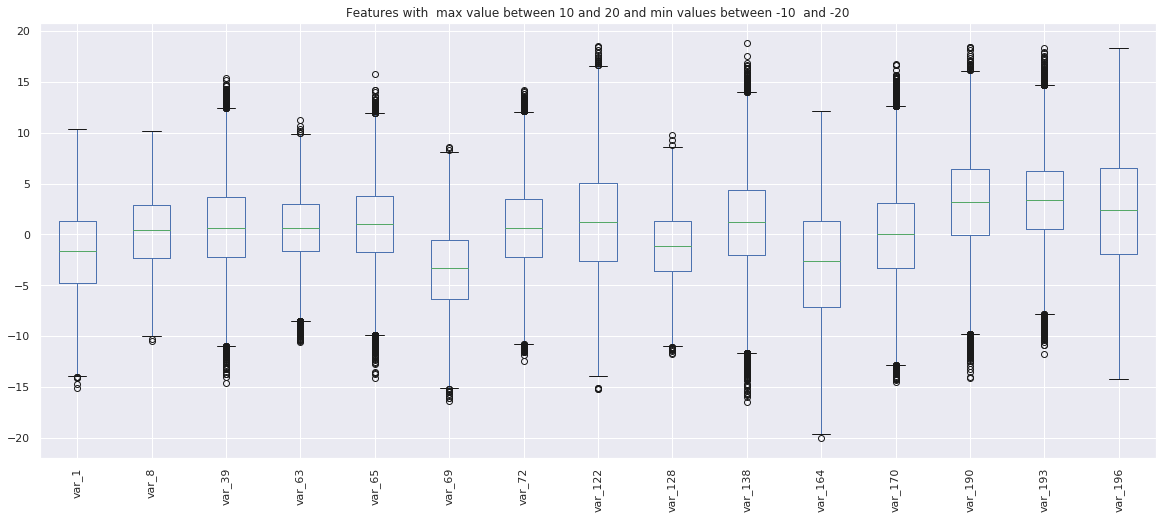

In [21]:
sns.set(rc={'figure.figsize':(20,8)})
setplustwentyminustwenty=train.loc[:,colplustwentyminustwenty].boxplot(rot=90)
setplustwentyminustwenty=setplustwentyminustwenty.set(yticks=[-20,-15,-10,-5,0,5,10,15,20],title="Features with  max value between 10 and 20 and min values between -10  and -20")

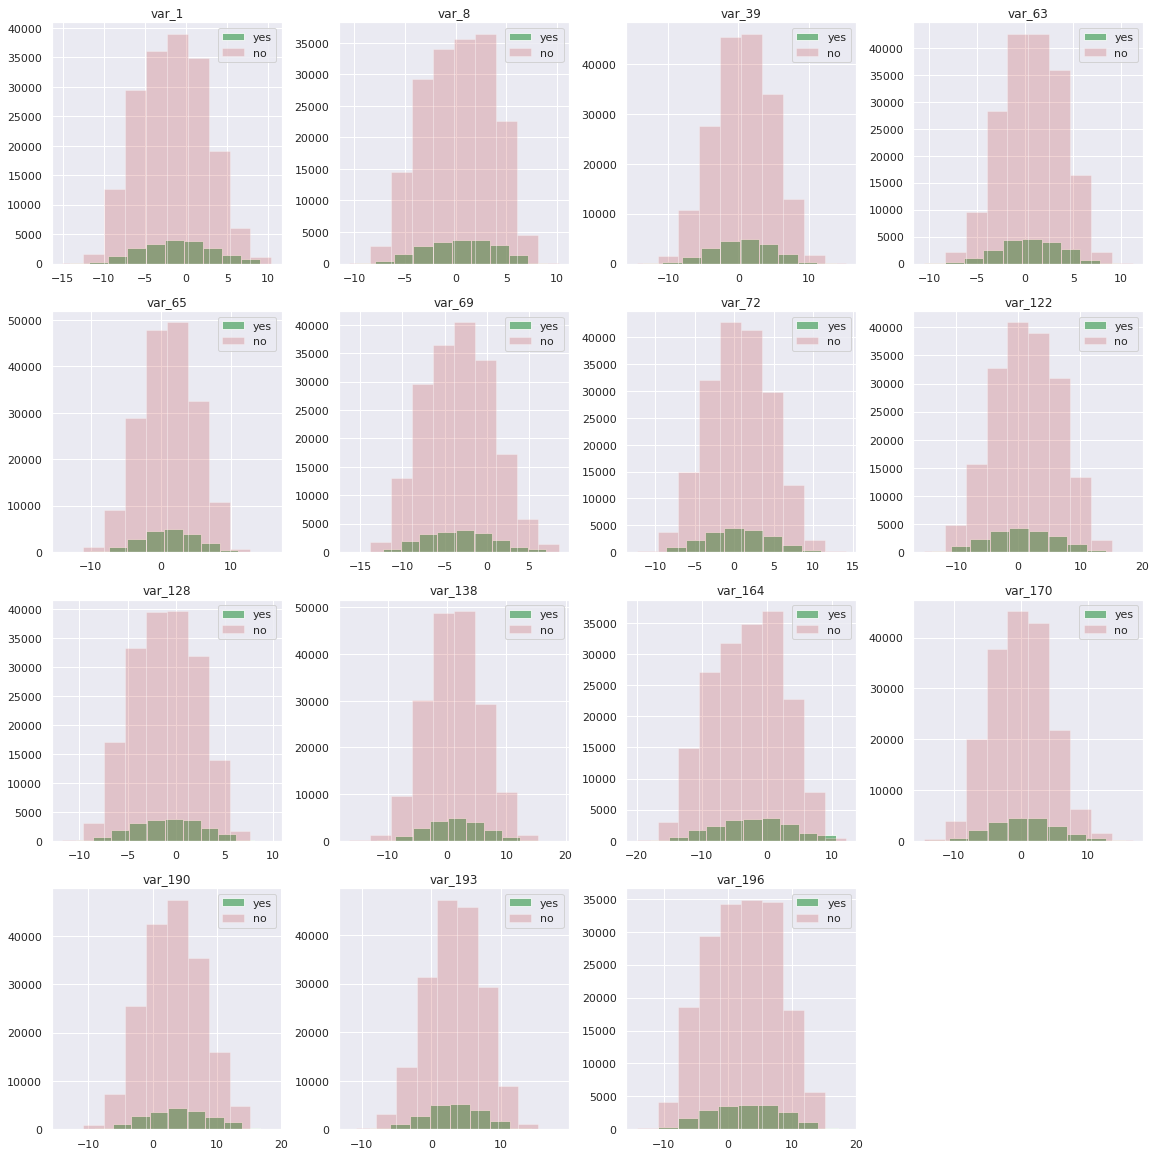

In [22]:
sns.set(rc={'figure.figsize':(16,16)})
for num, alpha in enumerate(colplustwentyminustwenty):
    plt.subplot(4, 4, num+1)
    plt.hist(sephist(alpha)[0], alpha=0.75, label='yes', color='g')
    plt.hist(sephist(alpha)[1], alpha=0.25, label='no', color='r')
    plt.legend(loc='upper right')
    plt.title(alpha)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

var_39,var_65 and var_138 appear to have similiar distribution of values and so is var_63 and var_128
For some of the features the ' transaction done'  group in green seems to have  lower range than the 'transaction not done' group in red.

**Features with  max value between 10 &  20  and min values less than  -20**

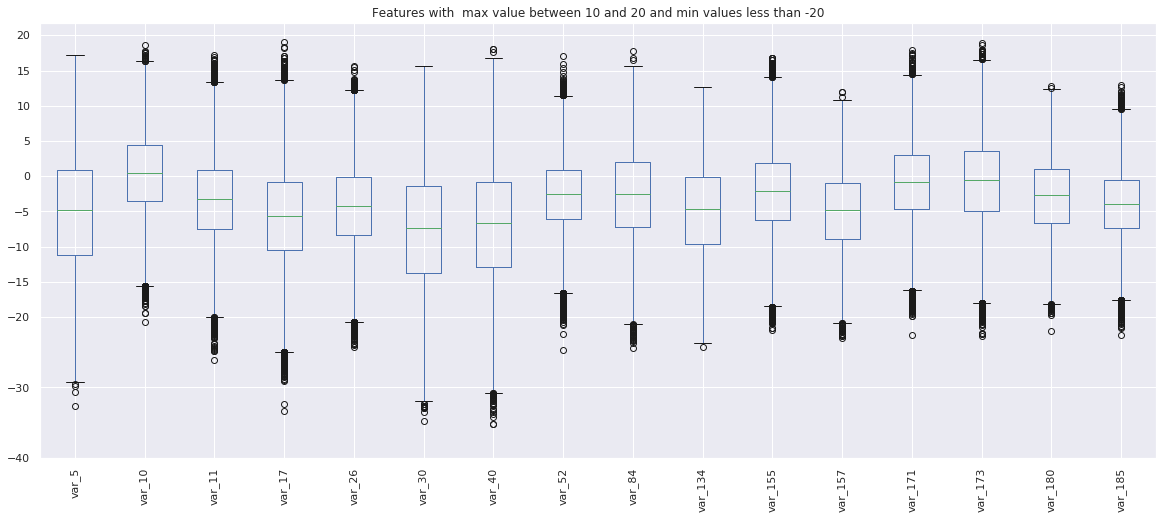

In [23]:
sns.set(rc={'figure.figsize':(20,8)})
setplustwentyminustwentyless=train.loc[:,colplustwentyminustwentyless].boxplot(rot=90)
setplustwentyminustwentyless=setplustwentyminustwentyless.set(yticks=[-40,-30,-20,-15,-10,-5,0,5,10,15,20],title="Features with  max value between 10 and 20 and min values less than -20")

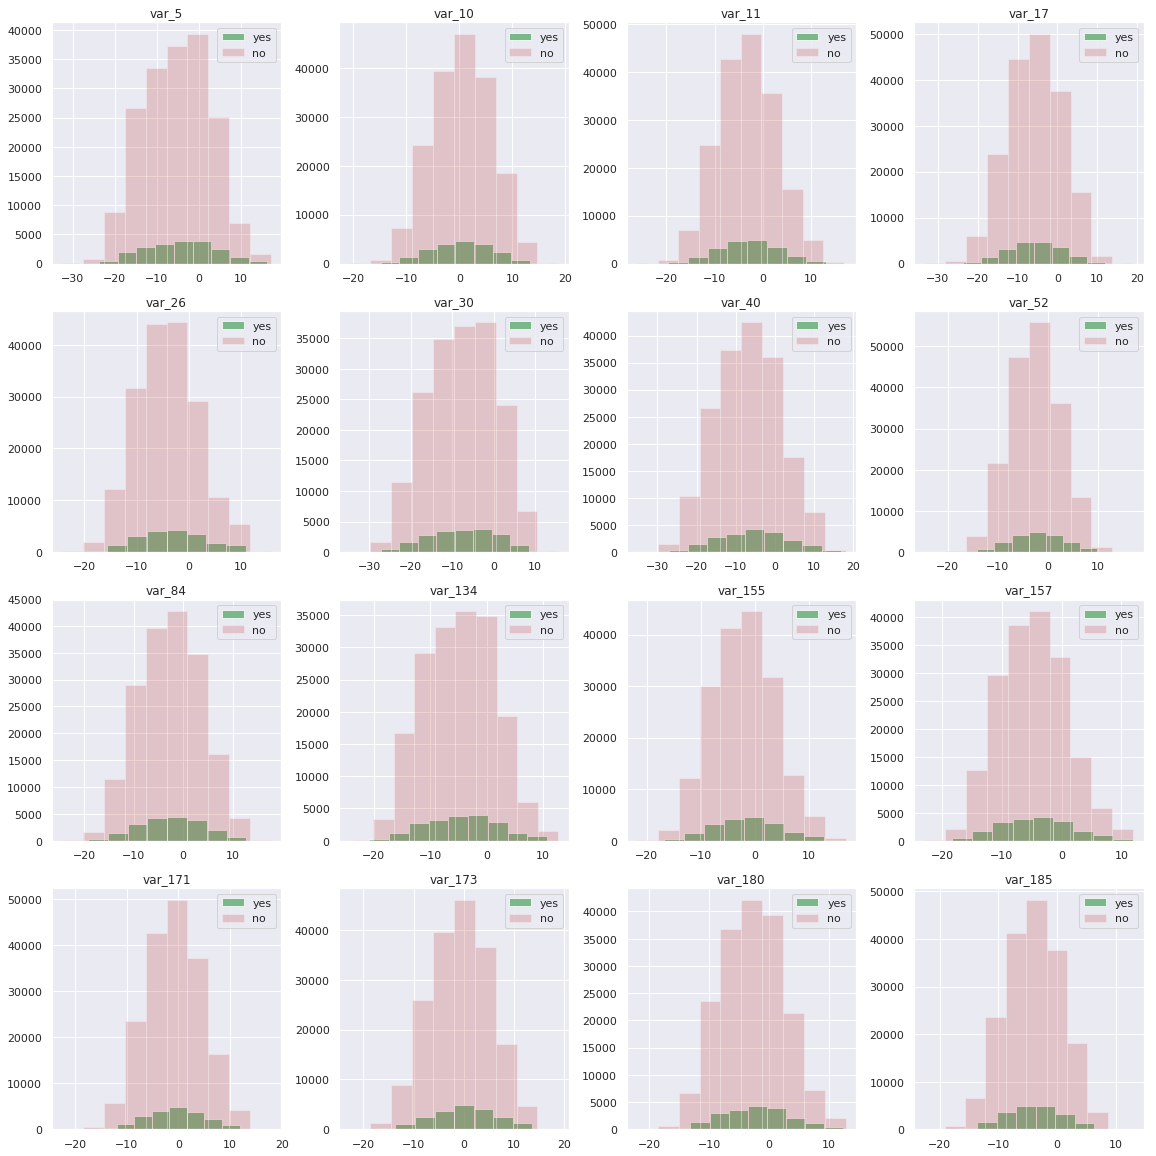

In [24]:
sns.set(rc={'figure.figsize':(16,16)})
for num, alpha in enumerate(colplustwentyminustwentyless):
    plt.subplot(4, 4, num+1)
    plt.hist(sephist(alpha)[0], alpha=0.75, label='yes', color='g')
    plt.hist(sephist(alpha)[1], alpha=0.25, label='no', color='r')
    plt.legend(loc='upper right')
    plt.title(alpha)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

var_84, var _155, var_157 appear to have similiar distribution of values and so does  var_11, var_180 & var_185

**Features with  max value greater than 20  and min values less than  -20**

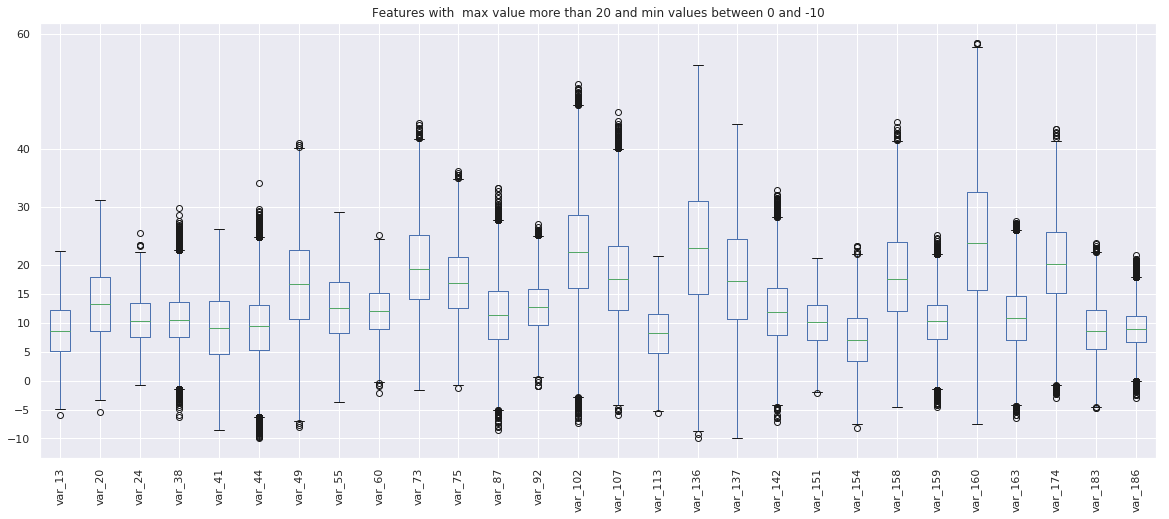

In [25]:
sns.set(rc={'figure.figsize':(20,8)})
setplustwentymoreminusten=train.loc[:,colplustwentymoreminusten].boxplot(rot=90)
setplustwentymoreminusten=setplustwentymoreminusten.set(yticks=[-10,-5,0,5,10,15,20,30,40,60],title="Features with  max value more than 20 and min values between 0 and -10")

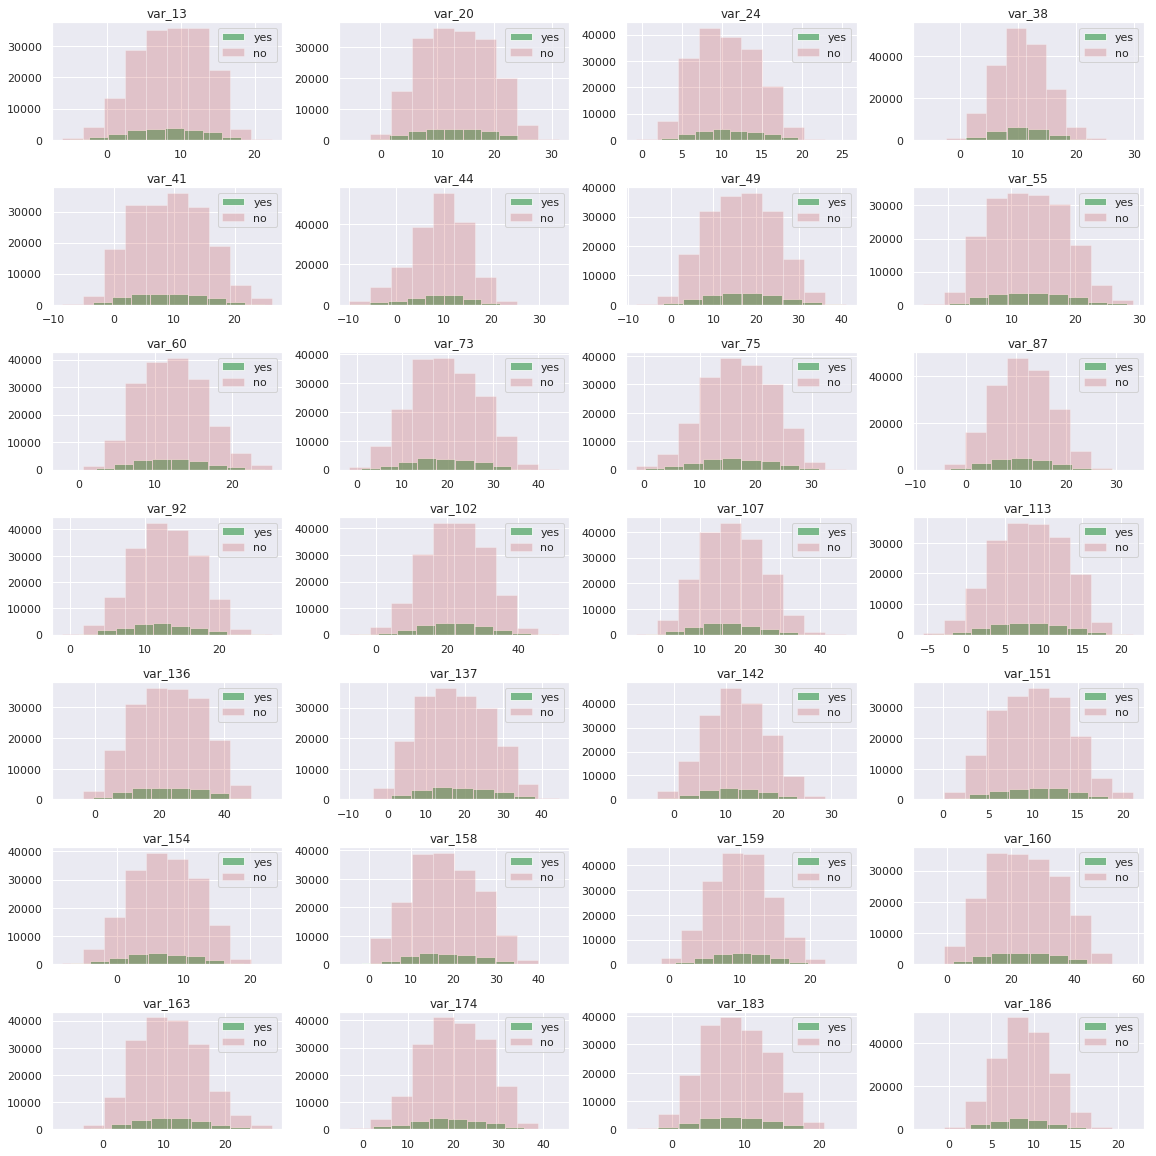

In [26]:
sns.set(rc={'figure.figsize':(16,16)})
for num, alpha in enumerate(colplustwentymoreminusten):
    plt.subplot(7, 4, num+1)
    plt.hist(sephist(alpha)[0], alpha=0.75, label='yes', color='g')
    plt.hist(sephist(alpha)[1], alpha=0.25, label='no', color='r')
    plt.legend(loc='upper right')
    plt.title(alpha)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

(var_73 & var_158) , (var_92,var_154,var_159 & var_163) , ( var_20 & var_55) 
The features within the above groups  appear to have similiar distribution of values . Here also the range  of values for the *'transaction done'* group in green appears to be shorter.

**Features with  max value more than 20 and min values between -10 and -20**

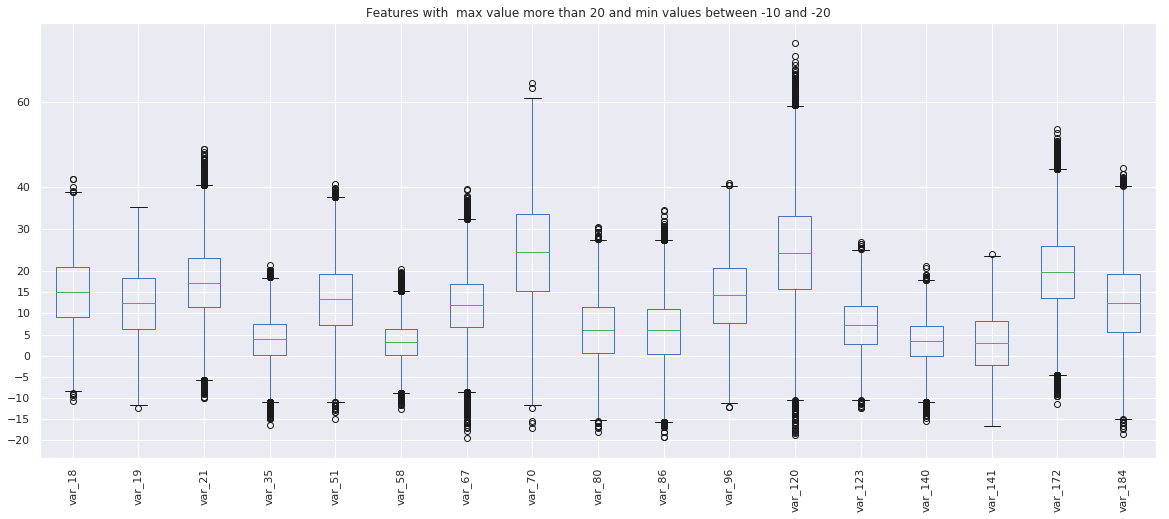

In [27]:
sns.set(rc={'figure.figsize':(20,8)})
setplustwentymoreminustwenty=train.loc[:,colplustwentymoreminustwenty].boxplot(rot=90)
setplustwentymoreminustwenty=setplustwentymoreminustwenty.set(yticks=[-20,-15,-10,-5,0,5,10,15,20,30,40,60],title="Features with  max value more than 20 and min values between -10 and -20")

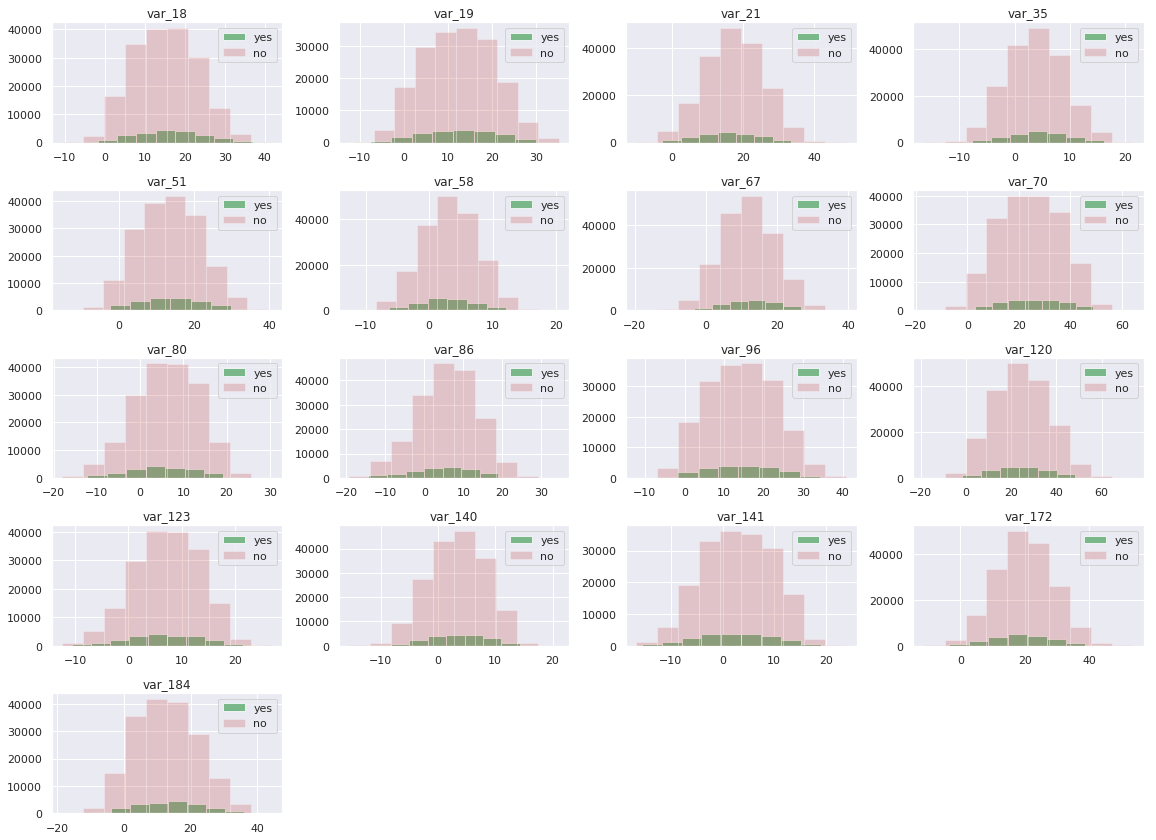

In [28]:
sns.set(rc={'figure.figsize':(16,16)})
for num, alpha in enumerate(colplustwentymoreminustwenty):
    plt.subplot(7, 4, num+1)
    plt.hist(sephist(alpha)[0], alpha=0.75, label='yes', color='g')
    plt.hist(sephist(alpha)[1], alpha=0.25, label='no', color='r')
    plt.legend(loc='upper right')
    plt.title(alpha)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

var_21 & var_172 appear to have similiar distribution of values

**Features with  max value more than 20 and min values less than -20**

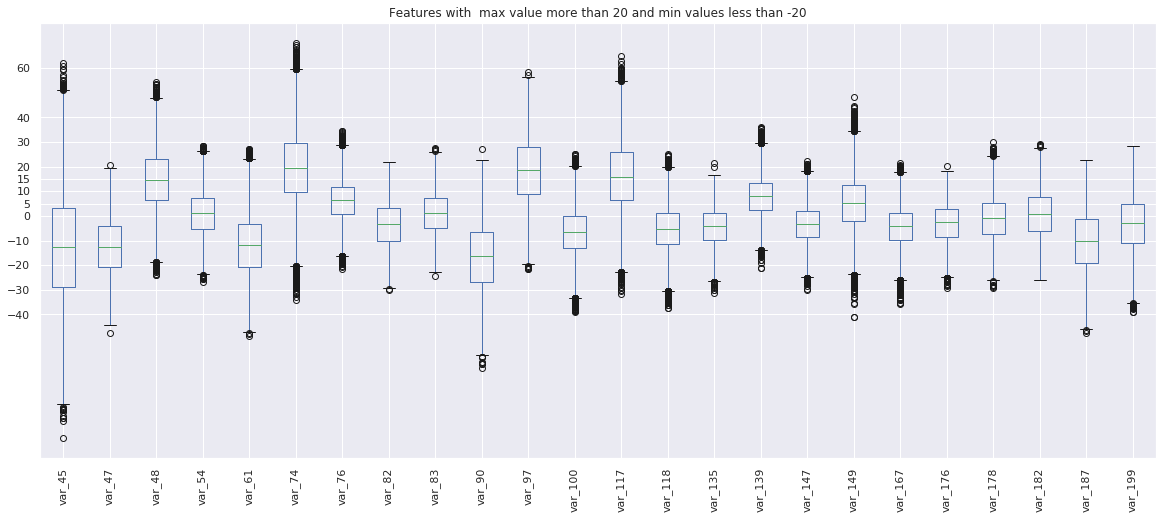

In [29]:
sns.set(rc={'figure.figsize':(20,8)})
setplustwentymoreminustwentymore=train.loc[:,colplustwentymoreminustwentymore].boxplot(rot=90)
setplustwentymoreminustwentymore=setplustwentymoreminustwentymore.set(yticks=[-40,-30,-20,-10,0,5,10,15,20,30,40,60],title="Features with  max value more than 20 and min values less than -20")

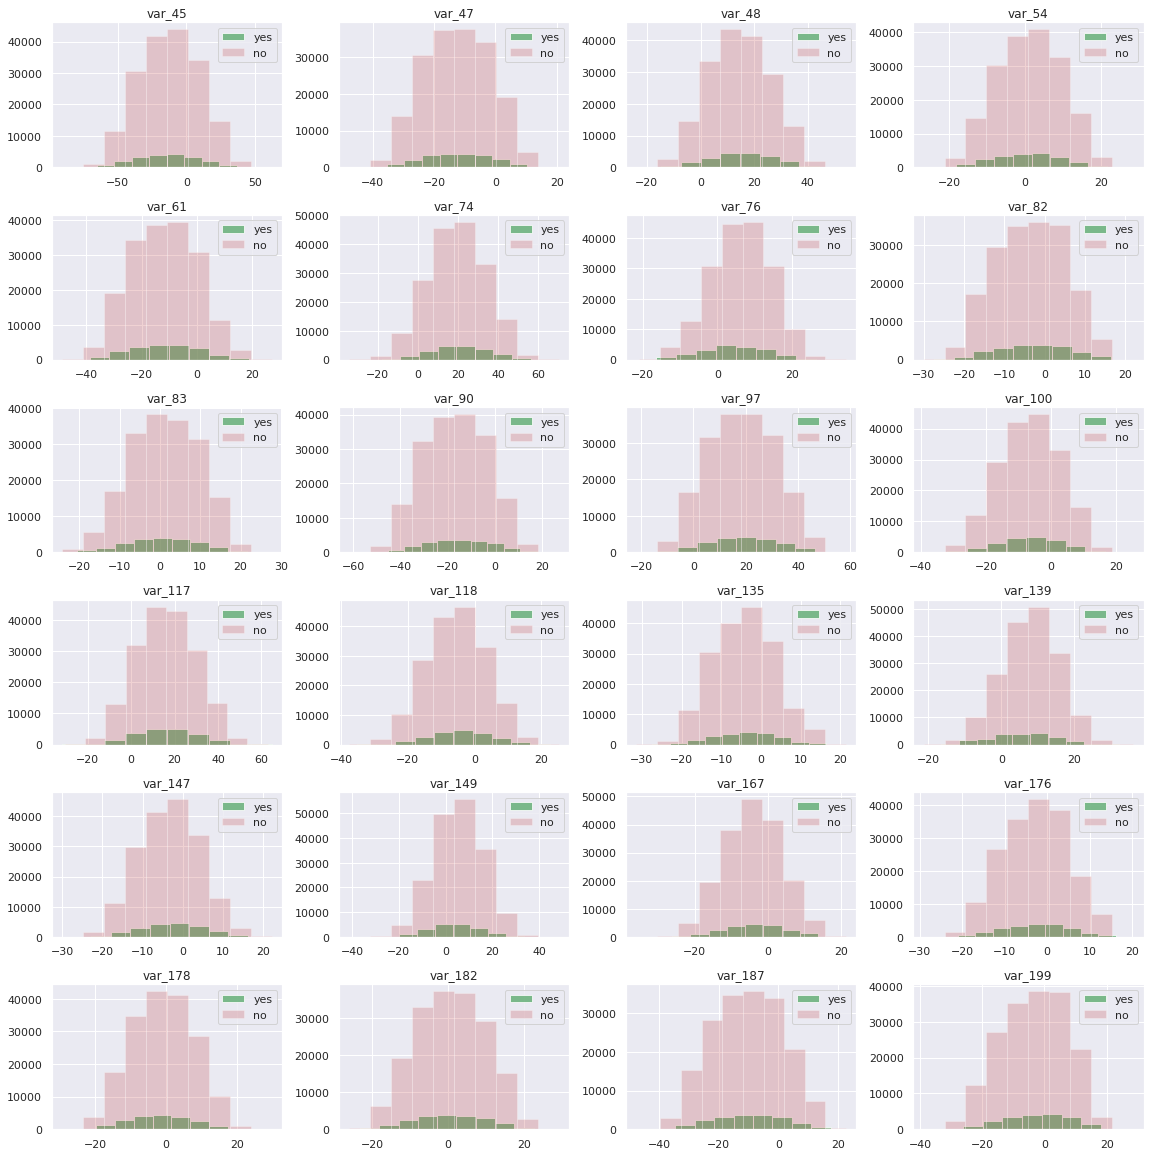

In [30]:
sns.set(rc={'figure.figsize':(16,16)})
for num, alpha in enumerate(colplustwentymoreminustwentymore):
    plt.subplot(6, 4, num+1)
    plt.hist(sephist(alpha)[0], alpha=0.75, label='yes', color='g')
    plt.hist(sephist(alpha)[1], alpha=0.25, label='no', color='r')
    plt.legend(loc='upper right')
    plt.title(alpha)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

var_47 & var_187 appear to have similiar distribution of values

**Checking for correlation between feature**s

In [31]:
traincorr = train.iloc[:,2:].corr()
traincorr.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,0.000355,0.003468,-0.001996,-0.002717,-0.004584,-0.000043,0.001112,-0.001664,0.004292,0.001505,-0.000932,0.000781,0.002322,-0.000987,0.003658,0.001158,0.006117,0.000985,0.001081,-0.000426,0.003187,-0.002097,0.000274,-0.003343,-0.003933,0.001469,-0.002556,-0.000253,-0.000470,-0.001409,...,-0.002975,-0.004248,0.000719,0.000320,-0.000132,-0.002302,-0.007269,0.002156,0.001848,-0.004478,0.002574,0.001678,-0.005587,0.002499,-0.000683,-0.000546,0.001197,0.000953,0.001165,0.003447,0.001939,0.001952,-0.001957,-0.001721,-0.000554,0.001868,0.001267,0.001413,0.001770,0.000543,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,0.002875,0.004778,-0.001977,-0.001303,-0.001544,0.004946,-0.002481,-0.001180,0.000289,0.001246,-0.002255,-0.001519,0.001762,0.003606,0.001417,0.000844,0.004778,-0.004551,-0.002463,0.006328,-0.002244,-0.002811,0.002713,0.001072,-0.002965,0.004293,-0.004466,-0.000122,0.001545,-0.000754,...,0.000223,-0.000245,-0.001470,0.002911,0.003409,0.002436,-0.006578,-0.004629,0.001956,-0.002523,0.001036,0.004399,-0.002802,0.002784,-0.004758,0.001693,-0.001331,0.002266,-0.002005,0.000883,0.003376,0.000008,0.001516,0.001055,-0.000248,0.002600,0.002227,-0.000236,-0.002185,0.005840,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,-0.001932,-0.000474,0.005180,-0.003781,-0.008795,-0.002627,0.004063,0.000102,0.000841,0.003529,0.001643,0.002162,-0.006885,0.000297,0.002280,0.001693,-0.000913,0.006138,0.000224,-0.000424,0.000480,0.002209,-0.002581,0.005500,0.001293,-0.004599,0.005809,0.002875,-0.001025,-0.000735,0.002290,...,0.000551,0.003607,0.005942,-0.000706,0.000467,-0.003284,-0.006253,0.000237,0.003340,-0.003999,0.003445,-0.000273,0.001126,0.000710,-0.006836,-0.001028,0.000362,-0.004572,-0.003408,0.001823,0.002365,-0.002341,-0.001202,0.002198,0.003259,0.003372,-0.001282,0.002799,0.000008,0.002448,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,-0.000826,-0.000897,0.000482,-0.001794,-0.005717,0.000534,0.003093,0.003011,0.003618,0.000995,-0.000481,0.003385,-0.000037,-0.002905,0.001633,-0.002006,-0.002307,0.001946,-0.001970,-0.003186,0.001003,0.004797,0.001658,0.001703,-0.001879,-0.002028,0.000071,-0.001193,0.000254,-0.002748,-0.002054,...,0.001588,0.000527,-0.002177,0.001567,-0.002164,-0.002283,0.001971,-0.000035,-0.000979,0.002248,-0.003915,0.000810,0.000391,0.000896,-0.001661,0.000777,0.002612,-0.002112,0.003307,-0.000462,-0.003653,0.000037,0.000629,0.003642,-0.001153,-0.001247,0.003210,-0.000505,0.000289,-0.001066,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
var_4,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,0.000049,0.004549,0.001194,-0.000918,-0.003445,0.000780,0.000333,0.002298,-0.000919,-0.000527,0.001264,-0.000306,0.000895,0.000586,0.000235,0.000575,-0.003167,0.001963,0.003874,0.001686,0.001286,-0.001692,-0.000036,0.002694,0.001905,-0.001106,-0.001185,0.000506,0.001954,-0.001452,0.002069

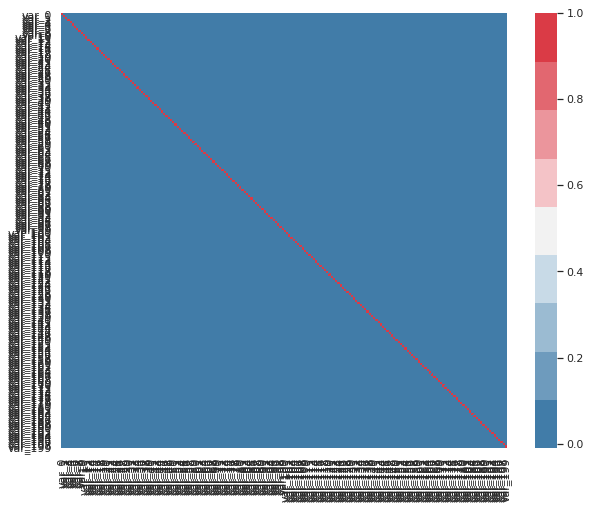

In [32]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(traincorr,xticklabels=traincorr.columns,yticklabels=traincorr.columns,cmap=sns.diverging_palette(240, 10, n=9))

***No correlation between any features . Does this mean all features are important?***

**Kolmogorov-Smirnov test**

Before concluding let's do a check of whether feature values in test and train comes from the same sampling  distribution.
Kolmogorov-Smirnov  is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.
If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

In [33]:
from scipy.stats import ks_2samp
from tqdm import tqdm
ks_values =[]
p_values  = []
train_columns = train.iloc[:,2:].columns
for i in tqdm(train_columns):
    ks_values.append(ks_2samp(test[i] , train[i])[0])
    p_values.append(ks_2samp(test[i] , train[i])[1])
p_values_series = pd.Series(p_values, index = train_columns) 


100%|██████████| 200/200 [00:32<00:00,  6.32it/s]


For the two tailed test at 95% confidence level the pvalue has to be less than 0.05 to reject the null hypothesis that both samples are from same distribution.Let's look for values less than 0.05

In [34]:
dissimiliar_features= p_values_series[p_values_series <0.05].index

As per the Kolmogorov-Smirnov test 46 features have a high probability of not being from the same sampling distribution.
Will this affect the models? 
Let's combine the test and train data to compare these features and understand their didtribution in train and test.

In [35]:
train['is_train'] = 1
test['is_train'] = 0
combined = pd.concat([train,test],sort=False)

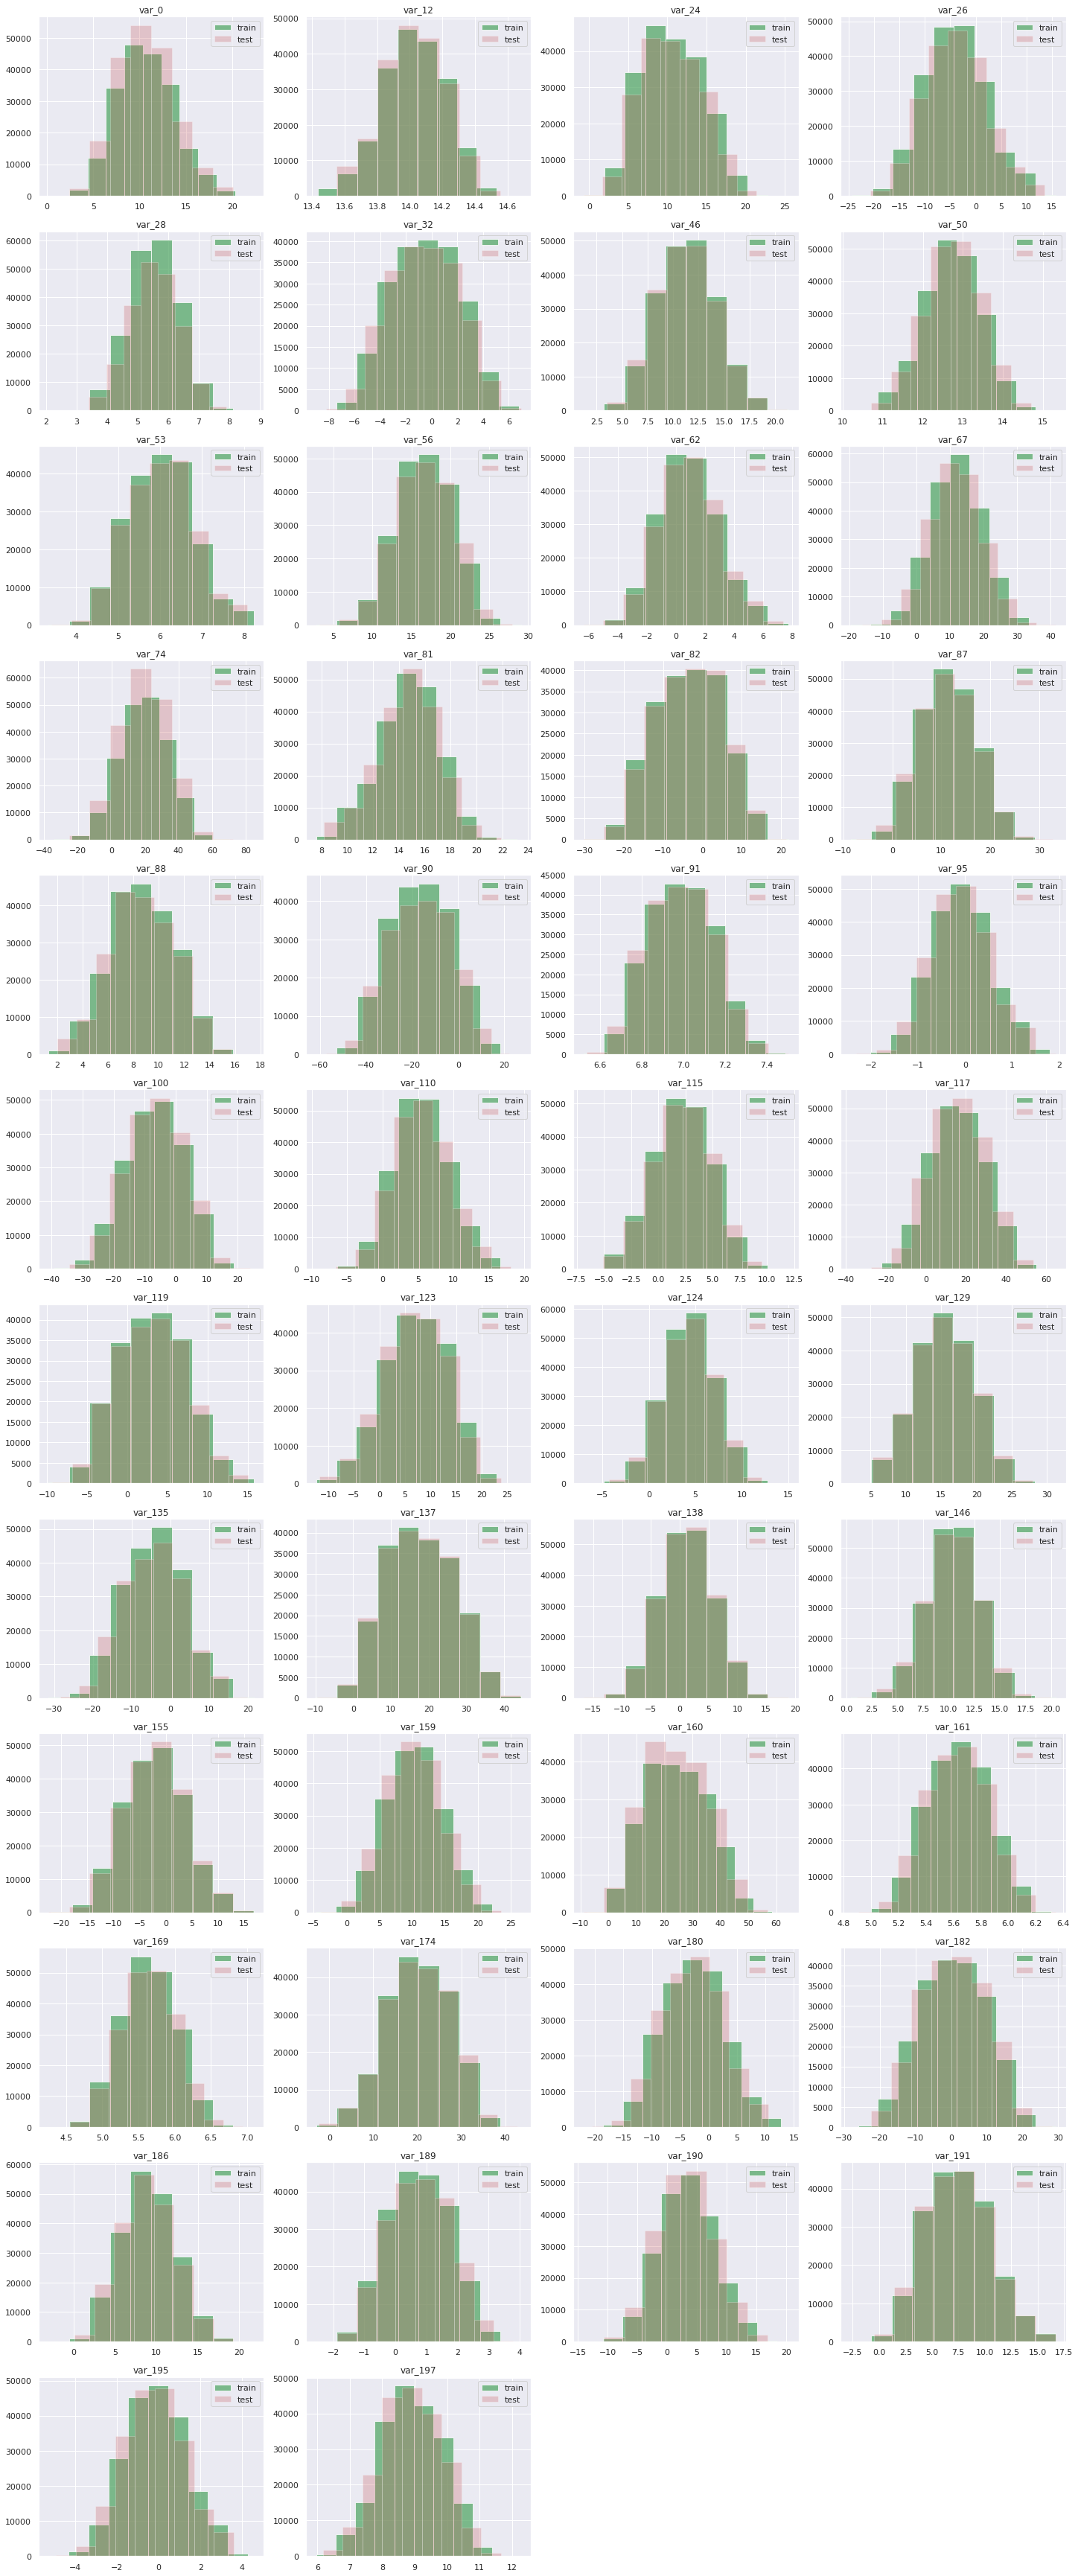

In [36]:
sns.set(rc={'figure.figsize':(20,48)})
def  diffcheck(col):
    traindata = combined[combined['is_train'] == 1][col]
    testdata = combined[combined['is_train'] == 0][col]
    return traindata, testdata

for num, alpha in enumerate(dissimiliar_features):
    plt.subplot(12, 4, num+1)
    plt.hist(diffcheck(alpha)[0], alpha=0.75, label='train', color='g')
    plt.hist(diffcheck(alpha)[1], alpha=0.25, label='test', color='r')
    plt.legend(loc='upper right')
    plt.title(alpha)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

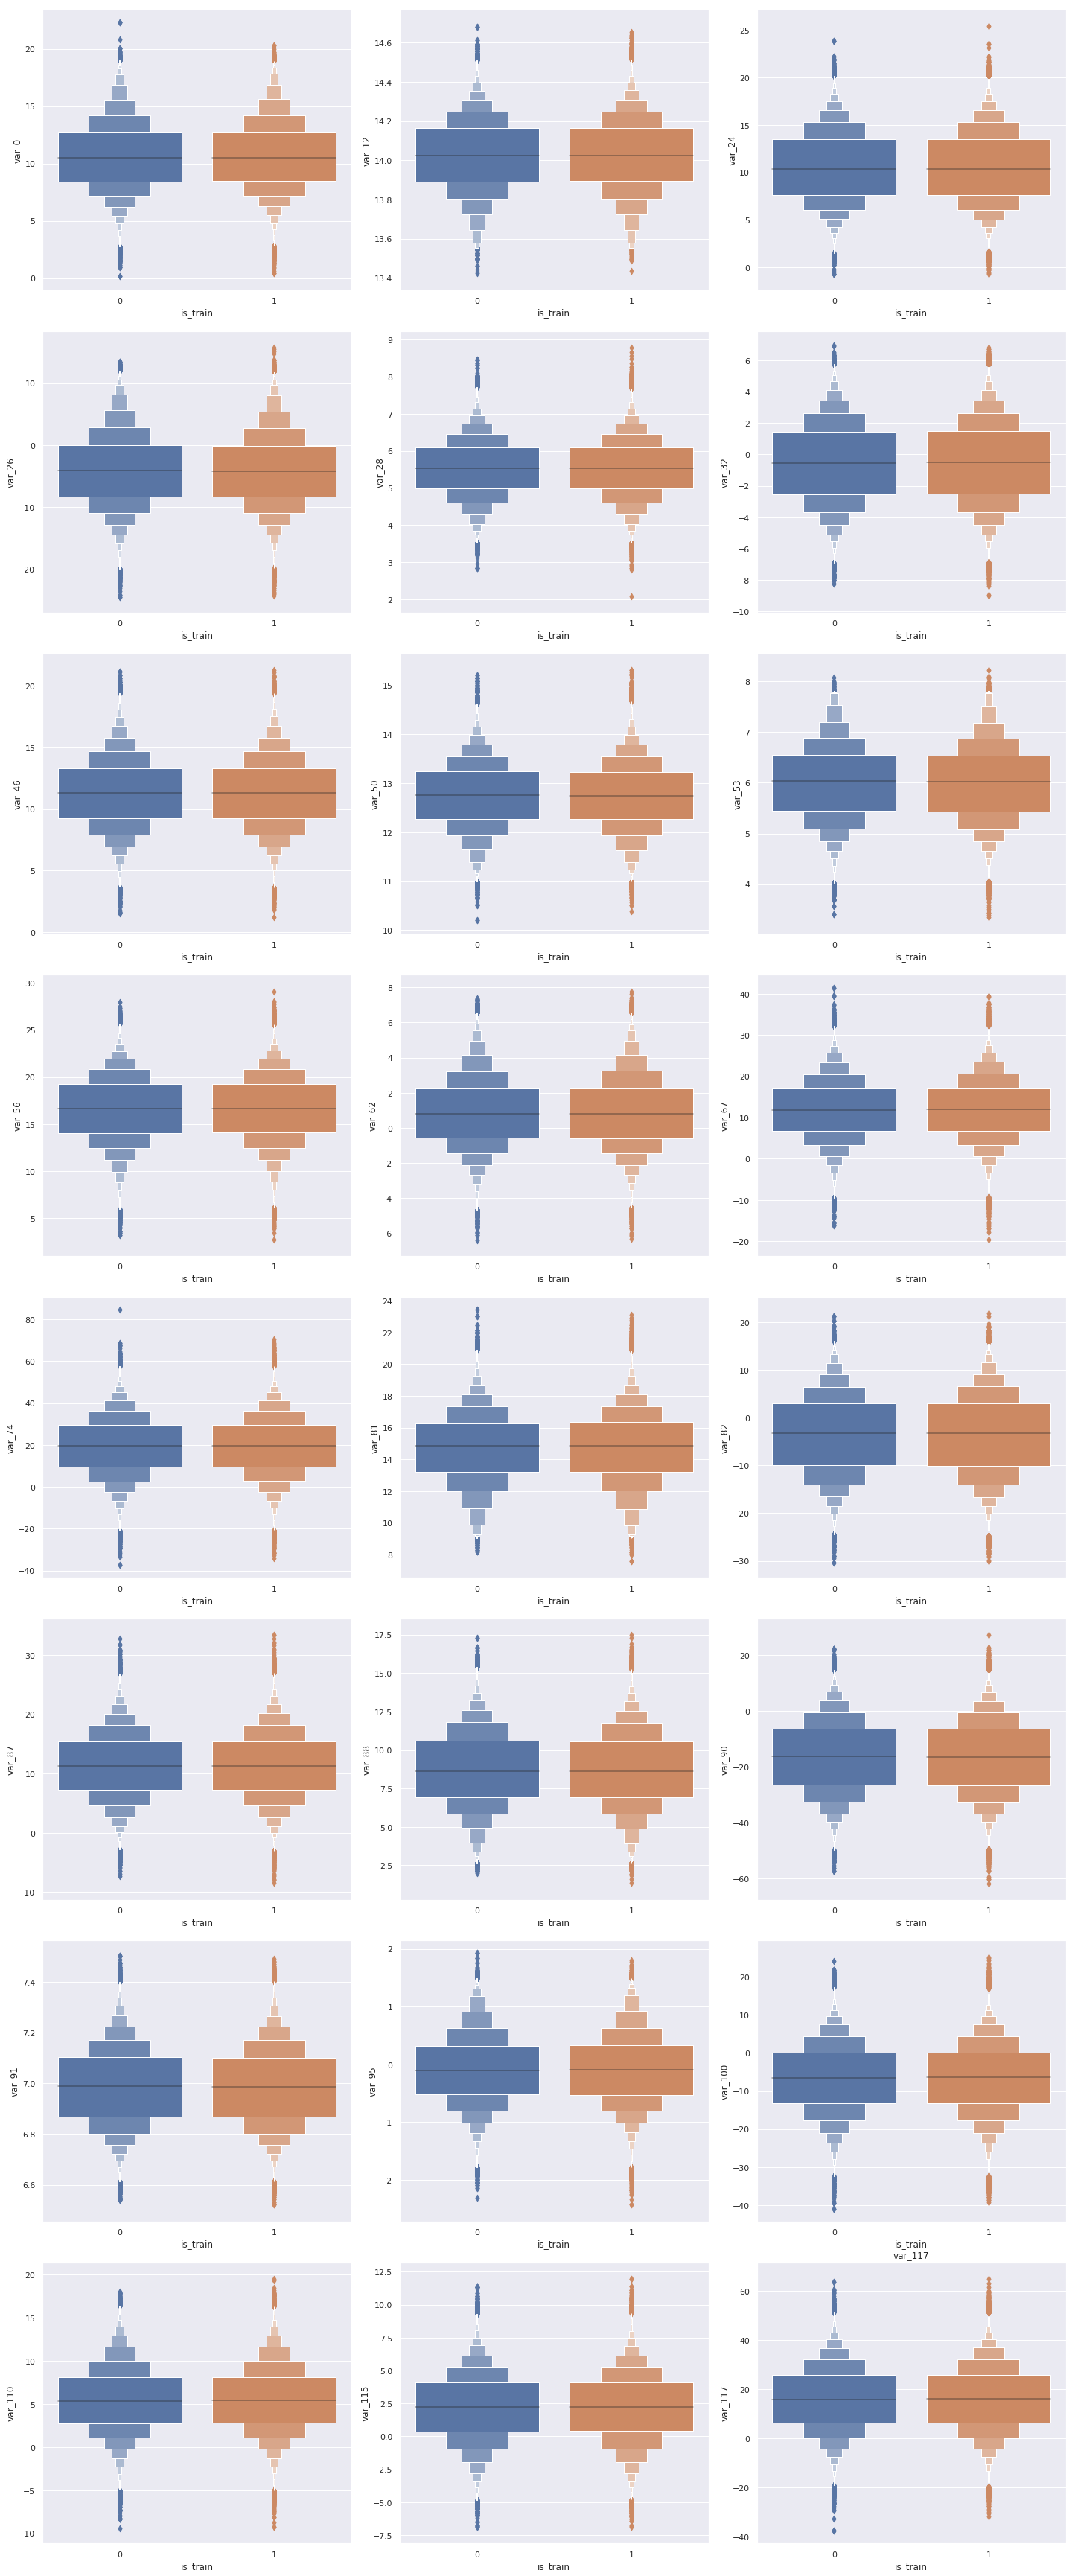

In [37]:
sns.set(rc={'figure.figsize':(20,48)})
fig, axes = plt.subplots(8,3)
for num, alpha in enumerate(list(dissimiliar_features[0:24])):
    a = sns.boxenplot(x='is_train',y=alpha,data=combined, ax=axes.flatten()[num])
# fig.delaxes(axes[11,2])
# fig.delaxes(axes[11,3])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) 
plt.title(alpha)
plt.show()


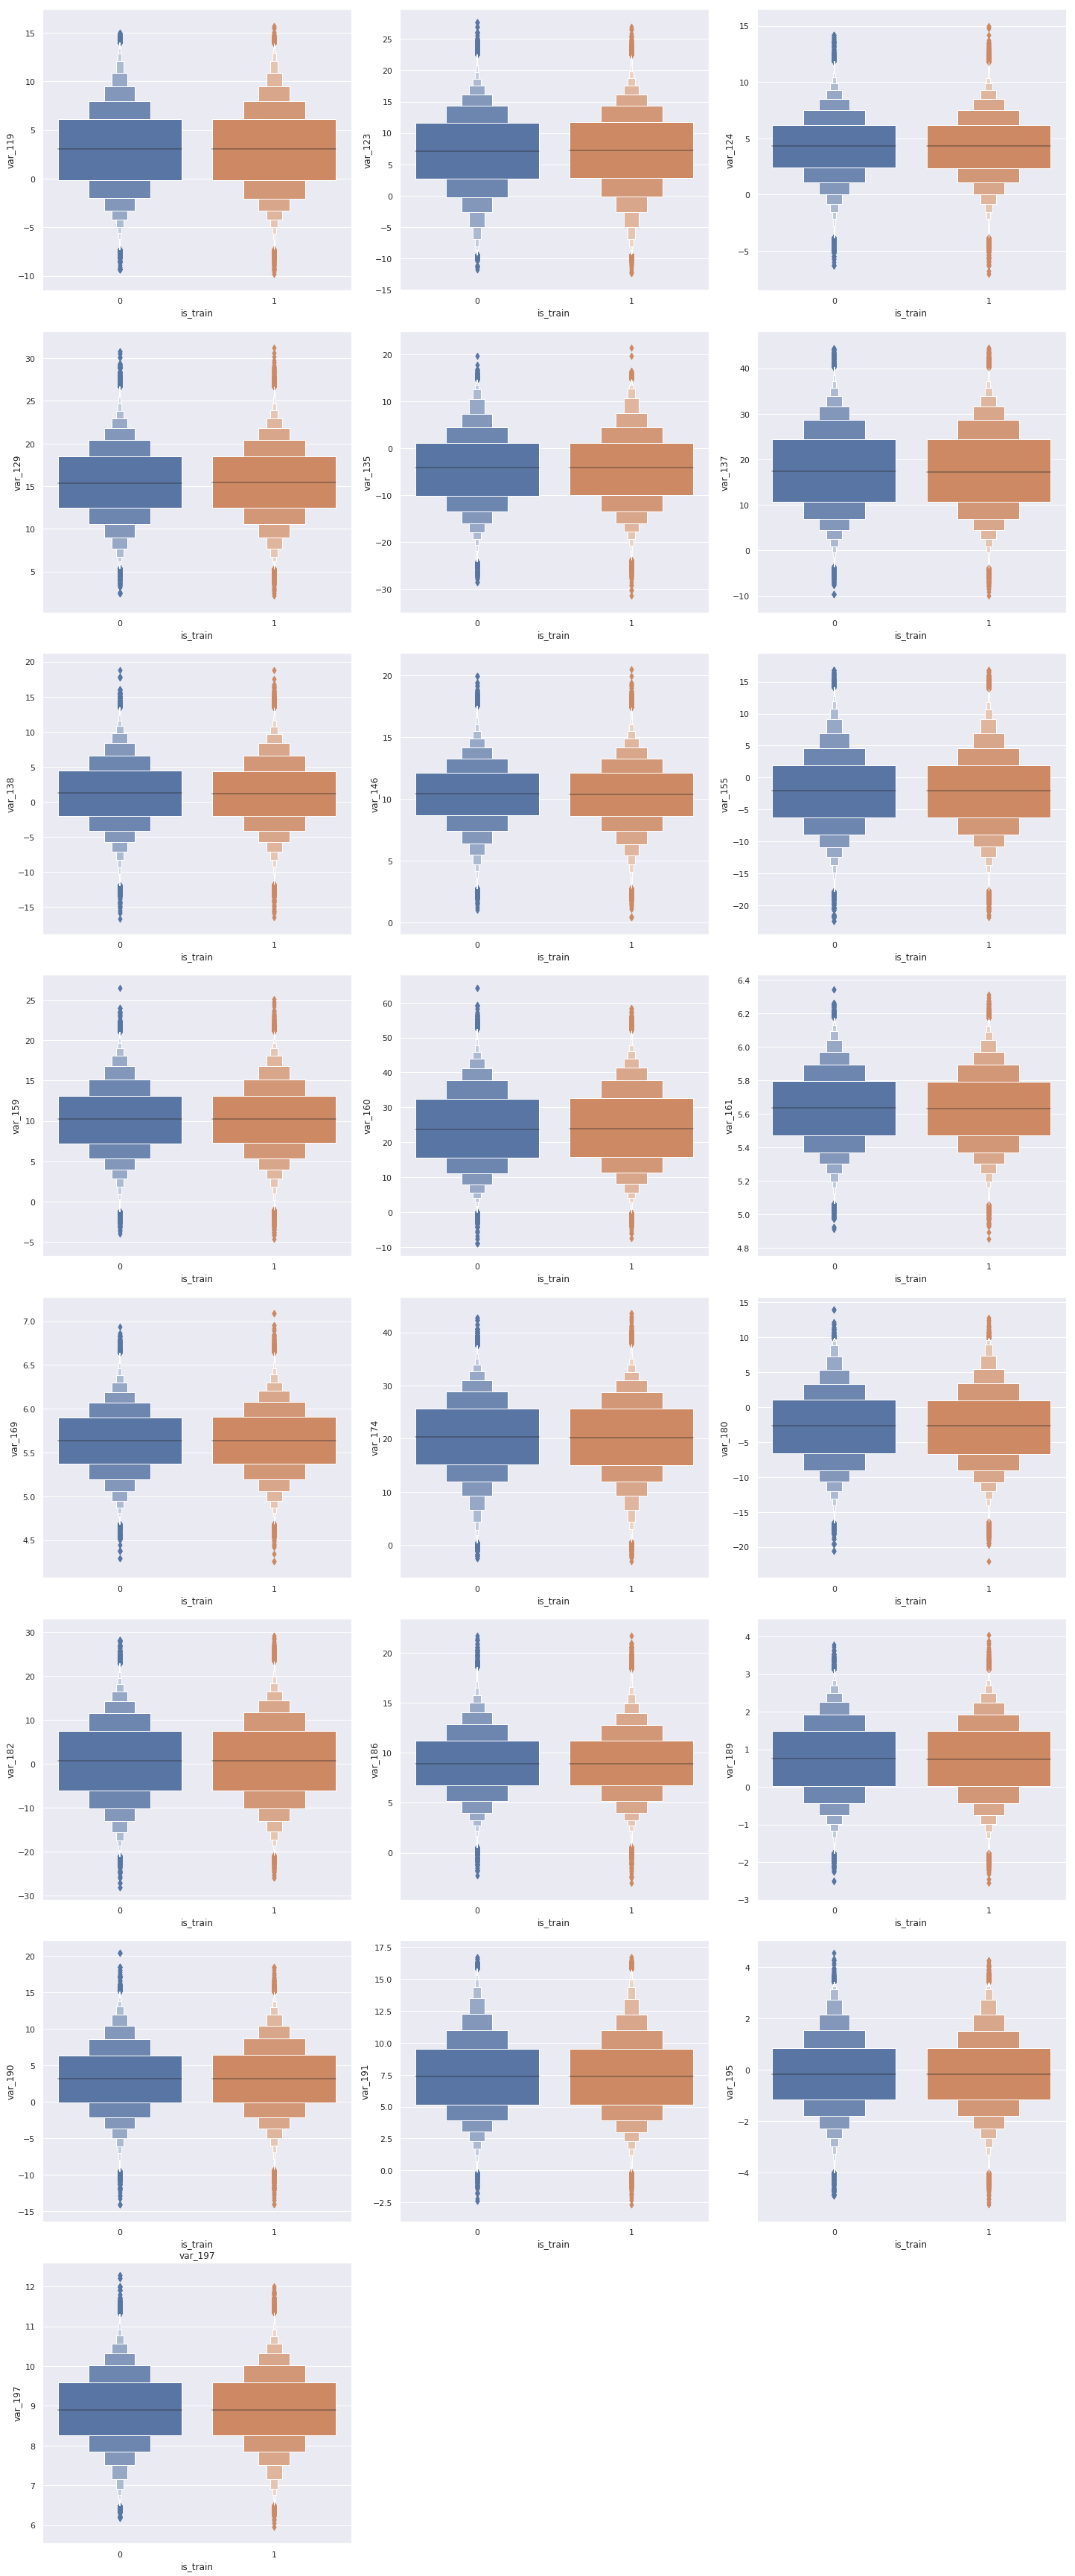

In [38]:
sns.set(rc={'figure.figsize':(20,48)})
fig, axes = plt.subplots(8,3)
for num, alpha in enumerate(list(dissimiliar_features[24:])):
    a = sns.boxenplot(x='is_train',y=alpha,data=combined, ax=axes.flatten()[num])
fig.delaxes(axes[7,1])
fig.delaxes(axes[7,2])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0) 
plt.title(alpha)
plt.show()

In [39]:
# sns.set(rc={'figure.figsize':(16,48)})
# set1=train.iloc[:,47:92].hist(layout=(9,5),sharey=True)